# Flourishing in the Workplace
Benjamin Amar

15/10/2023

# Step 0 - Import Libraries

### ONLY RUN THIS CELL ONCE

In [1]:
pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


### Libraries

In [2]:
#Importing all libraries
import os
import pandas as pd
%pylab inline
import seaborn as sns
import geopandas
import folium
from folium.plugins import HeatMap
import sys
import openpyxl
import datetime

import import_ipynb

Populating the interactive namespace from numpy and matplotlib


## Step 0.1 - Import dataset here 🖍️

In [3]:
path = "Flourishing_248.xlsx"
data = pd.DataFrame()

if path.endswith('.csv'):
    data = pd.read_csv(path, index_col=0)

elif path.endswith('.xlsx') or path.endswith('.xls'):
    data = pd.read_excel(path)

elif path.endswith('.txt'):
    data = pd.read_csv(path, sep='*', encoding='latin')

else:
    print(f"Unsupported file format. Please provide a .csv or .xlsx file")
    
if data is not None:
    print(f"Dataframe {path} loaded successfully! 👍")

Dataframe Flourishing_248.xlsx loaded successfully! 👍


In [4]:
def create_directory_and_files(path):
    # Remove the file extension from the path
    file_name = os.path.splitext(os.path.basename(path))[0]

    # Create the main directory with the file_name
    main_dir_name = file_name
    if not os.path.exists(main_dir_name):
        os.mkdir(main_dir_name)

    # Initialize a counter for directory and file numbering
    counter = 1

    while True:
        # Generate directory name with a zero-padded number
        dir_name = f"{main_dir_name}_{counter:02}"
        try:
            # Try to create the directory inside the main directory
            os.mkdir(os.path.join(main_dir_name, dir_name))

            # Generate the file name
            file_name_with_counter = f"{file_name}_analysis_{counter:02}.txt"
            file_path = os.path.join(main_dir_name, dir_name, file_name_with_counter)

            # Create and open the text file for writing
            with open(file_path, 'w') as txt_file:
                pass  # Do nothing, just create an empty file

            # Set the output_file and output_dir variables
            output_file = file_path
            output_dir = os.path.abspath(os.path.join(main_dir_name, dir_name))

            return output_file, output_dir
        except FileExistsError:
            # If the directory already exists, increment the counter and try the next number
            counter += 1


output_file, output_dir = create_directory_and_files(path)
print(f"Output File: {output_file}")
print(f"Output Directory: {output_dir}")

Output File: Flourishing_248\Flourishing_248_02\Flourishing_248_analysis_02.txt
Output Directory: F:\iCloudDrive\EM Lyon\AI Booster\03_Introduction to Machine Learning\Flourishing_248\Flourishing_248_02


In [5]:
datac = data.copy()

# Step 1 - Data Frame Observation

## 1.1 - Dataframe type

In [6]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          248 non-null    int64  
 1   age         248 non-null    int64  
 2   education   248 non-null    int64  
 3   sex         248 non-null    int64  
 4   famstatus   248 non-null    int64  
 5   pro_cat     248 non-null    int64  
 6   pro_quant   248 non-null    int64  
 7   priv_cat    248 non-null    int64  
 8   priv_quant  248 non-null    int64  
 9   positivity  248 non-null    float64
 10  flow        248 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 21.4 KB


In [7]:
datac.head()

,ID,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow
0,344,72,6,2,2,3,82,3,83,4.142857,44
1,317,45,6,2,2,3,81,3,83,4.000000,44
2,444,43,5,1,1,3,79,3,78,5.000000,47
3,270,60,2,2,3,3,79,3,82,4.666667,42
4,52,49,2,2,2,3,77,3,73,2.285714,33


## 1.2 - Features type consistency

In [8]:
# Initialize a dictionary to store type consistency results
type_consistency = {}

# Iterate through DataFrame columns
for column in datac:
    # Get the unique data types in the column
    unique_types = datac[column].apply(type).unique()
    
    # Check if there's more than one unique data type
    if len(unique_types) == 1:
        type_consistency[column] = f"🟢 {column}: Consistent ({unique_types[0].__name__})"
    else:
        type_consistency[column] = f"🔴 {column}: Inconsistent ({', '.join(t.__name__ for t in unique_types)})"

# Print the type consistency results for each feature
for consistency in type_consistency.values():
    print(consistency)
    #output_file.write(consistency)

🟢 ID: Consistent (int)
🟢 age: Consistent (int)
🟢 education: Consistent (int)
🟢 sex: Consistent (int)
🟢 famstatus: Consistent (int)
🟢 pro_cat: Consistent (int)
🟢 pro_quant: Consistent (int)
🟢 priv_cat: Consistent (int)
🟢 priv_quant: Consistent (int)
🟢 positivity: Consistent (float)
🟢 flow: Consistent (int)


## 1.3 - Dataframe Type Conversion

You can skip this cell since the formatted dataframe is saved under 'Flourishing_248_Formatted.csv'

In [9]:
# Dictionary to map the first letter to the complete data type name
data_type_mapping = {
    'i': 'int',
    'int': 'int',
    'f': 'float',
    'float': 'float',
    's': 'string',
    'string': 'string',
    'skip': 'skip',
    'k': 'skip',
    '': 'skip',
    'stop':'stop'
}



def label_values(column):
    unique_values = sorted(column.unique())  # Sort unique numerical values
    value_labels = {}

    for value in unique_values:
        label = input(f"Enter label for value '{value}': ")
        value_labels[value] = label

    return value_labels



for column in datac.columns:
    print(f"🔵 SELECTED - '{column}' column of type '{datac[column].dtype}' ...")
    
    
    
    # Show an overview of unique values in the column
    unique_values = sorted(datac[column].unique())
    num_unique_values = len(unique_values)
    max_values_to_display = 10  # Limit the number of values to display
    
    print(f"\n ▪️ Overview of unique values:")
    if num_unique_values <= max_values_to_display:
        for value in unique_values:
            print(f"   * '{value}'")
    else:
        for i, value in enumerate(unique_values[:max_values_to_display]):
            print(f"   * '{value}'")
        print(f"   ... and {num_unique_values - max_values_to_display} more unique values")
    
    
    
    # Prompt the user for the desired data type
    data_type_input = input(f" ❔ Enter the desired data type for '{column}' (int / float / string / skip / stop): ").strip().lower()
    
    # Get the complete data type name from the mapping for comparison with user input
    data_type = data_type_mapping.get(data_type_input)
    
    if data_type:
        
        # Skip conversion
        if data_type == 'skip':
            print(f" ⏩ SKIPPING - '{column}' column will not be converted\n\n")
            continue
        
        # Convert to INT
        elif data_type == 'int':
            if datac[column].dtype == object:  # Check if the column contains string data
                datac[column] = pd.to_numeric(datac[column].astype(str).str.replace('[^\d.]', '', regex=True), errors='coerce')
            datac[column] = datac[column].round().apply(lambda x: int(x) if not pd.isna(x) else np.nan)
        
        # Convert to FLOAT
        elif data_type == 'float':
            if datac[column].dtype == object:  # Check if the column contains string data
                datac[column] = pd.to_numeric(datac[column].astype(str).str.replace('[^\d.]', '', regex=True), errors='coerce')
            datac[column] = datac[column].round().astype(float)  # Always round for 'float'

        # Convert to STRING
        elif data_type == 'string':
            datac[column] = datac[column].astype(str)

            # Ask if the user wants to label values
            label_values_option = input(f" ❔ CONVERT TO STRING - Do you want to label values in '{column}' to create categorical data? (yes/no): ").strip().lower()
            
            if label_values_option == 'yes':
                value_labels = label_values(datac[column])
                datac[column].replace(value_labels, inplace=True)
        
        # Stop the loop
        elif data_type == 'stop':
            print(f"\n ⏩ STOPPING - Skipping all remaining features")
            break
    
    # Error Handling
    else:
        print(f" ❗️ ERROR - Unsupported data type '{data_type_input}'")
        print(f" ⏩ SKIPPING - Skipping conversion for '{column}'\n\n")
        continue

    
    # Check if there are NaN values after conversion
    if datac[column].isna().any():
        print(f" ⚠️ Warning: NaN values found in '{column}' after conversion")
    
    print(f"\n ✅ CONVERTED - '{column}' column converted to {data_type}\n\n")

# Display the modified DataFrame
print(f"\n\n🆕 Modified DataFrame:")
print(datac)

🔵 SELECTED - 'ID' column of type 'int64' ...

 ▪️ Overview of unique values:
   * '1'
   * '3'
   * '4'
   * '7'
   * '8'
   * '9'
   * '10'
   * '11'
   * '13'
   * '15'
   ... and 238 more unique values
 ❔ Enter the desired data type for 'ID' (int / float / string / skip / stop): skip
 ⏩ SKIPPING - 'ID' column will not be converted


🔵 SELECTED - 'age' column of type 'int64' ...

 ▪️ Overview of unique values:
   * '20'
   * '23'
   * '25'
   * '27'
   * '28'
   * '29'
   * '30'
   * '31'
   * '32'
   * '33'
   ... and 34 more unique values
 ❔ Enter the desired data type for 'age' (int / float / string / skip / stop): 
 ⏩ SKIPPING - 'age' column will not be converted


🔵 SELECTED - 'education' column of type 'int64' ...

 ▪️ Overview of unique values:
   * '1'
   * '2'
   * '3'
   * '4'
   * '5'
   * '6'
 ❔ Enter the desired data type for 'education' (int / float / string / skip / stop): string
 ❔ CONVERT TO STRING - Do you want to label values in 'education' to create categorical da

In [12]:
datac.to_csv(f'{output_dir}\Flourishing_248_Formatted.csv', index=False)

## 1.4 - Describe numerical features

In [46]:
datac.describe(percentiles=[.01, .25, .5, .75, .99])

,ID,age,pro_quant,priv_quant,positivity,flow
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,245.201613,41.685484,50.612903,55.987903,1.812982,32.951613
std,155.254472,10.154568,13.431614,11.613367,0.803469,6.599417
min,1.000000,20.000000,21.000000,23.000000,0.384615,13.000000
1%,5.410000,23.000000,22.000000,27.470000,0.531118,16.940000
25%,107.500000,34.000000,41.000000,48.000000,1.272727,29.000000
50%,229.000000,40.000000,50.000000,56.000000,1.720000,33.000000
75%,387.500000,49.000000,61.000000,64.000000,2.170455,37.000000
99%,509.060000,65.060000,79.000000,82.000000,4.431667,47.530000
max,513.000000,72.000000,82.000000,83.000000,5.000000,48.000000


## 1.5 - Describe categorical features

In [47]:
try:
    print(datac.describe(include='object'))
except ValueError:
    print("🟨 Warning! There are no categorical features in this DataSet!")

              education     sex famstatus                      pro_cat  \
count               248     248       248                          248   
unique                6       2         3                            3   
top     5 Years or more  Female    Couple  Moderately Mentally Healthy   
freq                110     151       173                          159   

                           priv_cat  
count                           248  
unique                            3  
top     Moderately Mentally Healthy  
freq                            164  


# Step 2 - Univariate Analysis

## 2.1 - Numerical Univariate Analysis

🔵 Feature : ID

Central tendency measurement :
 * Mean:  245.2016129032258
 * Median:  229.0

Dispersion measurement :
 * Variance:  24006.75773933404
 * Standard deviation:  154.9411428231186

Shape measurement :
 * Skewness:  0.14475609908747927
 * Kurtosis:  -1.2960072436932533

P1 and P99 :
 * P1:  5.41
 * P5:  23.35
 * P25:  107.5
 * P50:  229.0
 * P75:  387.5
 * P95:  489.65
 * P99:  509.06

Outlier test :
✅ No outliers detected.


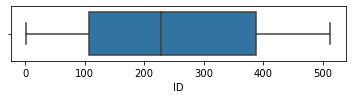

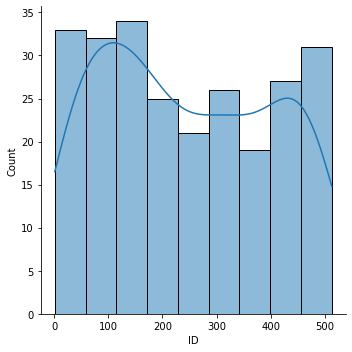

------------------------------





🔵 Feature : age

Central tendency measurement :
 * Mean:  41.685483870967744
 * Median:  40.0

Dispersion measurement :
 * Variance:  102.6994667013526
 * Standard deviation:  10.13407453600735

Shape measurement :
 * Skewness:  0.44166550998344933
 * Kurtosis:  -0.44131055588000034

P1 and P99 :
 * P1:  23.0
 * P5:  28.0
 * P25:  34.0
 * P50:  40.0
 * P75:  49.0
 * P95:  59.64999999999998
 * P99:  65.06

Outlier test :
🚨 Warning Outliers detected:
 * High outliers:
    ID  age        education     sex          famstatus      pro_cat  \
0  344   72  5 Years or more  Female  Separate/Divorced  Flourishing   

   pro_quant     priv_cat  priv_quant  positivity  flow  
0         82  Flourishing          83    4.142857    44  



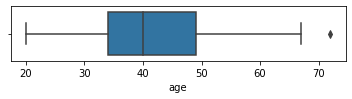

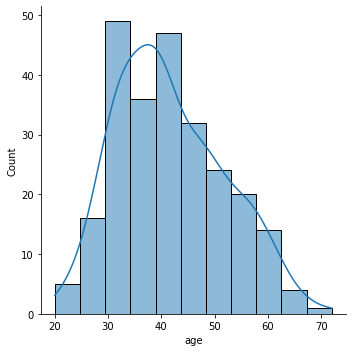

------------------------------





🔵 Feature : pro_quant

Central tendency measurement :
 * Mean:  50.61290322580645
 * Median:  50.0

Dispersion measurement :
 * Variance:  179.68080124869934
 * Standard deviation:  13.404506751413845

Shape measurement :
 * Skewness:  0.049480538040877646
 * Kurtosis:  -0.584486642513387

P1 and P99 :
 * P1:  22.0
 * P5:  29.35
 * P25:  41.0
 * P50:  50.0
 * P75:  61.0
 * P95:  73.0
 * P99:  79.0

Outlier test :
✅ No outliers detected.


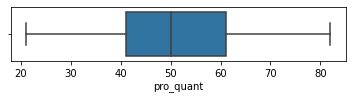

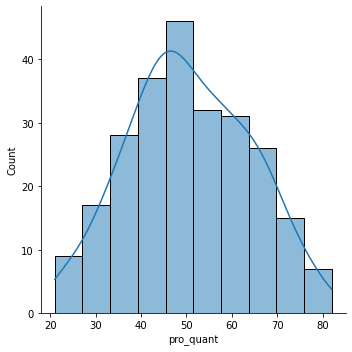

------------------------------





🔵 Feature : priv_quant

Central tendency measurement :
 * Mean:  55.98790322580645
 * Median:  56.0

Dispersion measurement :
 * Variance:  134.32646657127984
 * Standard deviation:  11.589929532627878

Shape measurement :
 * Skewness:  -0.22109393513618109
 * Kurtosis:  -0.2603818263551312

P1 and P99 :
 * P1:  27.47
 * P5:  36.35
 * P25:  48.0
 * P50:  56.0
 * P75:  64.0
 * P95:  73.64999999999998
 * P99:  82.0

Outlier test :
🚨 Warning Outliers detected:

 * Low outliers:
    ID  age        education   sex famstatus                      pro_cat  \
75  56   38  5 Years or more  Male    Single  Moderately Mentally Healthy   

    pro_quant     priv_cat  priv_quant  positivity  flow  
75         41  Languishing          23    0.764706    18  


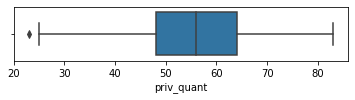

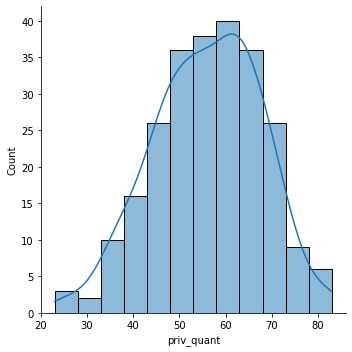

------------------------------





🔵 Feature : positivity

Central tendency measurement :
 * Mean:  1.812982254093246
 * Median:  1.72

Dispersion measurement :
 * Variance:  0.6429592051625673
 * Standard deviation:  0.8018473702410998

Shape measurement :
 * Skewness:  1.0959322654938788
 * Kurtosis:  1.7791869761605348

P1 and P99 :
 * P1:  0.5311175710594316
 * P5:  0.7142857142857143
 * P25:  1.2727272727272725
 * P50:  1.72
 * P75:  2.170454545454546
 * P95:  3.304411764705879
 * P99:  4.4316666666666675

Outlier test :
🚨 Warning Outliers detected:
 * High outliers:
      ID  age        education     sex          famstatus  \
0    344   72  5 Years or more  Female  Separate/Divorced   
1    317   45  5 Years or more  Female  Separate/Divorced   
2    444   43          4 Years    Male             Single   
3    270   60      High School  Female             Couple   
6    456   51  5 Years or more  Female  Separate/Divorced   
19   313   50  5 Years or more    Male             Cou

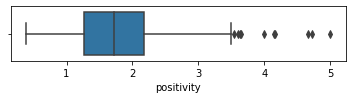

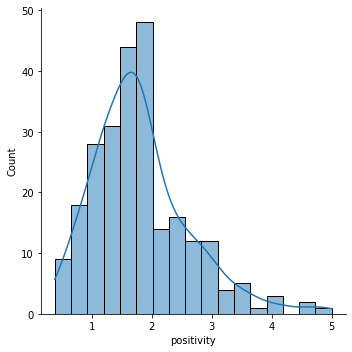

------------------------------





🔵 Feature : flow

Central tendency measurement :
 * Mean:  32.95161290322581
 * Median:  33.0

Dispersion measurement :
 * Variance:  43.37669094693031
 * Standard deviation:  6.586098309844024

Shape measurement :
 * Skewness:  -0.15879555934177014
 * Kurtosis:  -0.10924337059990119

P1 and P99 :
 * P1:  16.94
 * P5:  22.0
 * P25:  29.0
 * P50:  33.0
 * P75:  37.0
 * P95:  44.0
 * P99:  47.53

Outlier test :
🚨 Warning Outliers detected:

 * Low outliers:
      ID  age        education     sex famstatus                      pro_cat  \
69    13   32  5 Years or more  Female    Couple  Moderately Mentally Healthy   
153  252   31  5 Years or more  Female    Single  Moderately Mentally Healthy   
219  460   27  5 Years or more    Male    Single                  Languishing   

     pro_quant                     priv_cat  priv_quant  positivity  flow  
69          35                  Languishing          38    0.645161    14  
153         47  Moderately 

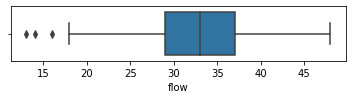

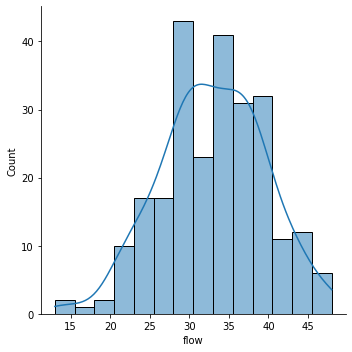

------------------------------





Finished! :D


In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = datac.select_dtypes(include=np.number).columns

for c in numerical_features:
    print(f"🔵 Feature : {c}\n")
    
    # Central tendency measurement
    print("Central tendency measurement :")
    print(" * Mean: ", datac[c].mean())
    print(" * Median: ", datac[c].median())
    
    # Dispersion measurement
    print("\nDispersion measurement :")
    print(" * Variance: ", datac[c].var(ddof=0))
    print(" * Standard deviation: ", datac[c].std(ddof=0))
    
    if (datac[c].mean() * datac[c].std(ddof=0)) >= 0 and datac[c].std(ddof=0) >= datac[c].mean():
        print(f"🚨 Warning Standard deviation {datac[c].std(ddof=0) / datac[c].mean() * 100} times bigger than mean")
    
    # Shape measurement
    print("\nShape measurement :")
    print(" * Skewness: ", datac[c].skew())
    print(" * Kurtosis: ", datac[c].kurtosis())
    
    # P1 and P99
    Q1 = datac[c].quantile(0.25)
    Q3 = datac[c].quantile(0.75)
    print("\nP1 and P99 :")
    print(" * P1: ", datac[c].quantile(0.01))
    print(" * P5: ", datac[c].quantile(0.05))
    print(" * P25: ", Q1)
    print(" * P50: ", datac[c].quantile(0.50))
    print(" * P75: ", Q3)
    print(" * P95: ", datac[c].quantile(0.95))
    print(" * P99: ", datac[c].quantile(0.99))
    
    # Outlier test
    print("\nOutlier test :")
    IQR = Q3 - Q1
    
    high_outliers = datac[(datac[c] > Q3 + 1.5 * IQR)]
    low_outliers = datac[(datac[c] < Q1 - 1.5 * IQR)]
    
    if not high_outliers.empty or not low_outliers.empty:
        print("🚨 Warning Outliers detected:")
        if not high_outliers.empty:
            print(" * High outliers:")
            print(high_outliers)
        print()
        if not low_outliers.empty:
            print(" * Low outliers:")
            print(low_outliers)
    else:
        print("✅ No outliers detected.")
    
    # Box plot and distribution plot
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=c, data=datac)
    plt.xlabel(c)
    plt.show()
    sns.displot(x=c, data=datac, kde=True)
    plt.show()
    
    print("------------------------------\n\n\n\n\n")

print("Finished! :D")

## 2.2 - Categorical Univariate Analysis

🔵 Feature : education



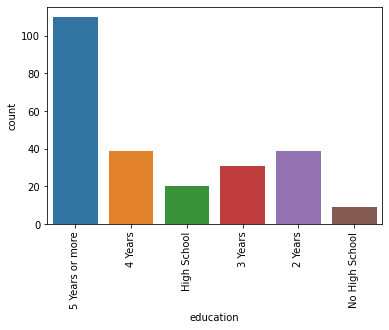

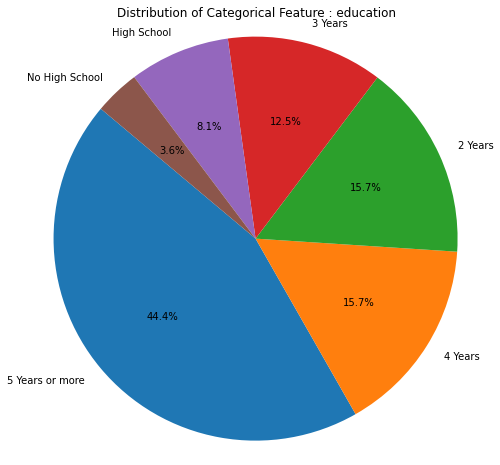

{'5 Years or more': 110, '4 Years': 39, '2 Years': 39, '3 Years': 31, 'High School': 20, 'No High School': 9}

------------------------------





🔵 Feature : sex



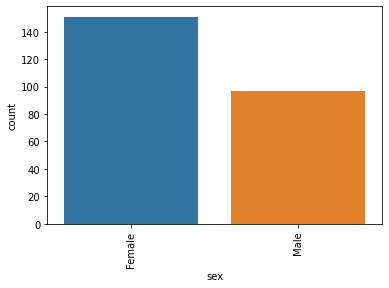

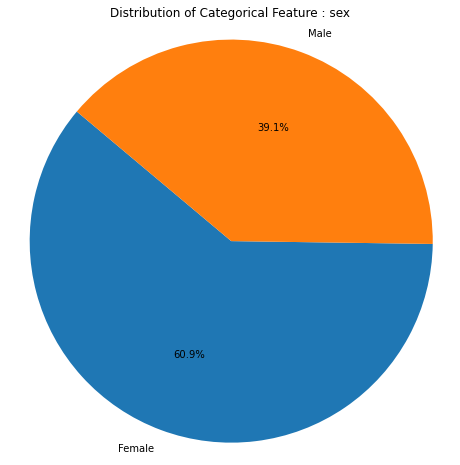

{'Female': 151, 'Male': 97}

------------------------------





🔵 Feature : famstatus



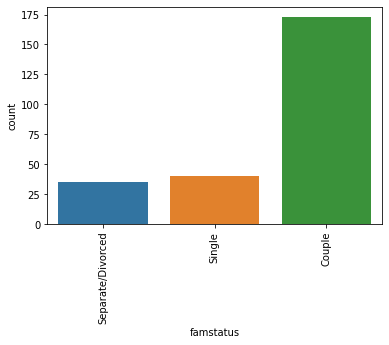

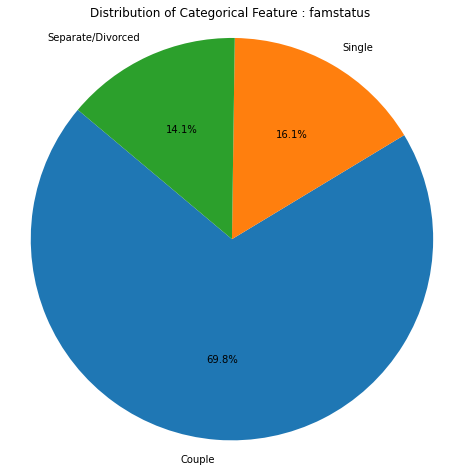

{'Couple': 173, 'Single': 40, 'Separate/Divorced': 35}

------------------------------





🔵 Feature : pro_cat



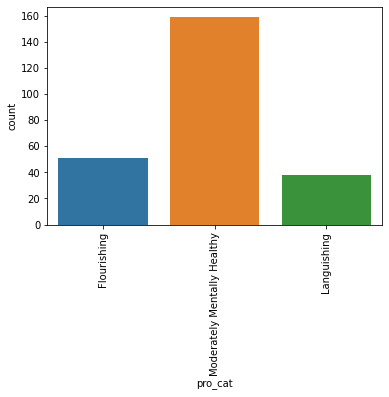

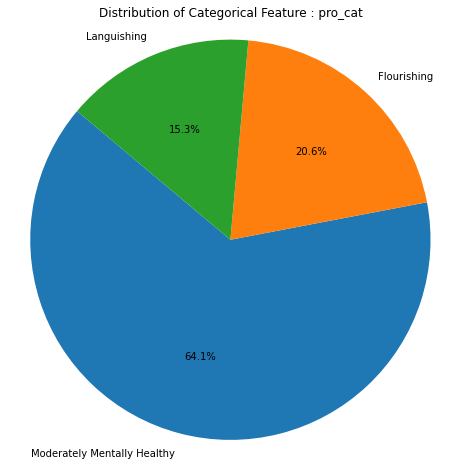

{'Moderately Mentally Healthy': 159, 'Flourishing': 51, 'Languishing': 38}

------------------------------





🔵 Feature : priv_cat



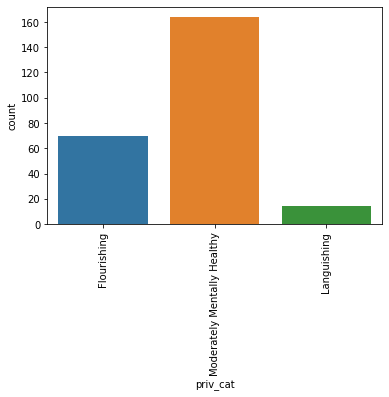

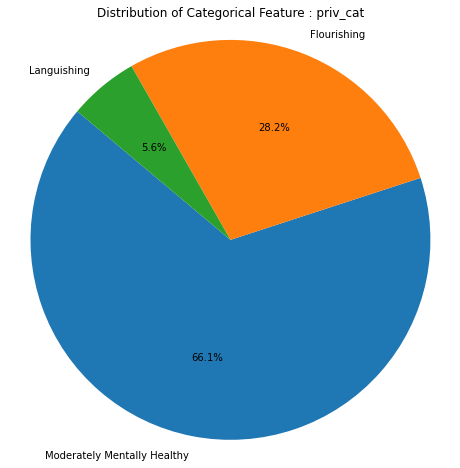

{'Moderately Mentally Healthy': 164, 'Flourishing': 70, 'Languishing': 14}

------------------------------





Finished! :D


In [49]:
categorical_features = datac.select_dtypes(include='object').columns

for c in categorical_features:
    # Create a count plot
    sns.countplot(data=datac, x=c)
    plt.xticks(rotation=90)
    print(f"🔵 Feature : {c}\n")
    plt.show()
    
    print()
    
    # Create a pie chart
    pie_data = datac[c].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f"Distribution of Categorical Feature : {c}")
    plt.show()
    
    # Print value counts as a dictionary
    print(pie_data.to_dict())
    print("\n------------------------------\n\n\n\n\n")

print("Finished! :D")

🔵 Feature : education

{'5 Years or more': 110, '4 Years': 39, '2 Years': 39, '3 Years': 31, 'High School': 20, 'No High School': 9}


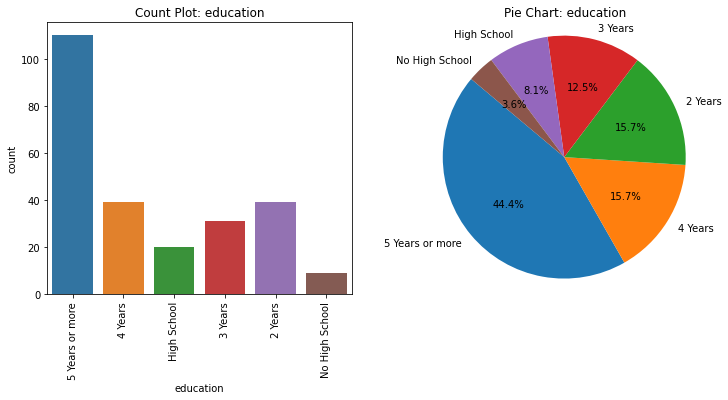


------------------------------





🔵 Feature : sex

{'Female': 151, 'Male': 97}


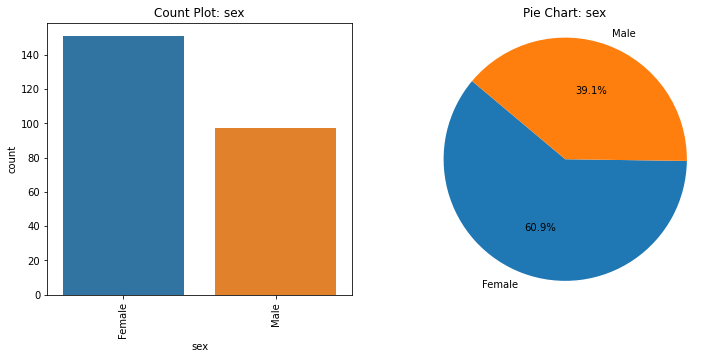


------------------------------





🔵 Feature : famstatus

{'Couple': 173, 'Single': 40, 'Separate/Divorced': 35}


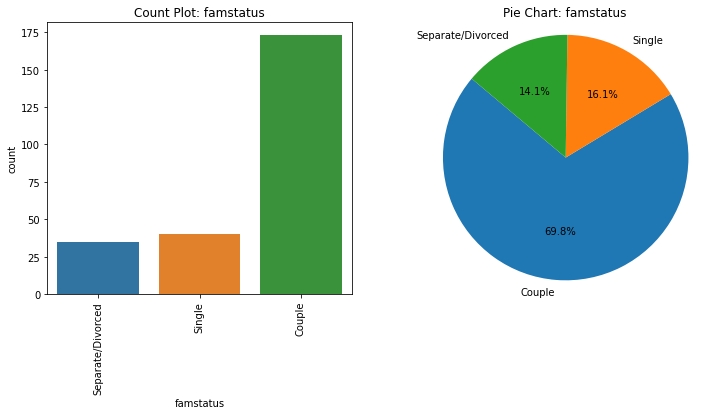


------------------------------





🔵 Feature : pro_cat

{'Moderately Mentally Healthy': 159, 'Flourishing': 51, 'Languishing': 38}


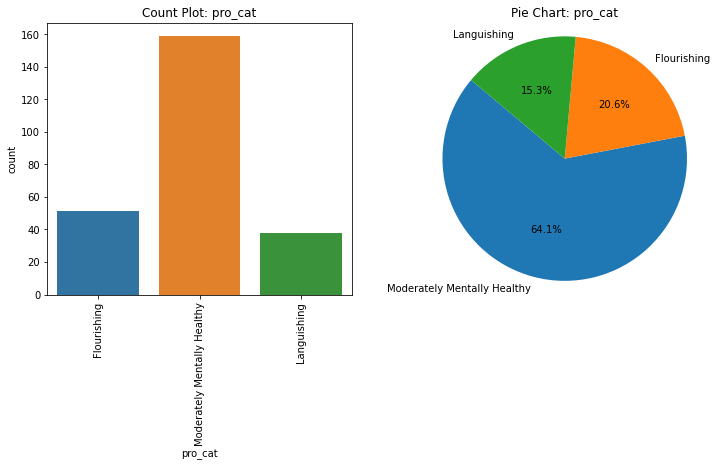


------------------------------





🔵 Feature : priv_cat

{'Moderately Mentally Healthy': 164, 'Flourishing': 70, 'Languishing': 14}


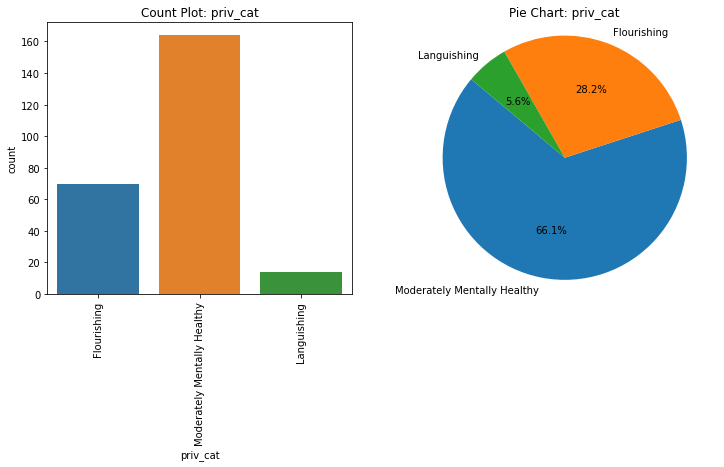


------------------------------





Finished! :D


In [50]:
categorical_features = datac.select_dtypes(include='object').columns

# Create a list to store all plots
all_plots = []

for c in categorical_features:
    # Create a new figure for each category
    plt.figure(figsize=(12, 5))

    # Create a count plot
    plt.subplot(1, 2, 1)
    sns.countplot(data=datac, x=c)
    plt.xticks(rotation=90)
    plt.title(f"Count Plot: {c}")

    # Create a pie chart
    plt.subplot(1, 2, 2)
    pie_data = datac[c].value_counts()
    plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f"Pie Chart: {c}")

    # Append the current plot to the list
    all_plots.append(plt.gcf())

    # Print value counts as a dictionary
    print(f"🔵 Feature : {c}\n")
    print(pie_data.to_dict())
    plt.show()
    print("\n------------------------------\n\n\n\n\n")



# Adjust spacing between subplots
plt.tight_layout()
plt.close()
    

print("Finished! :D")

# Step 3 - Bivariate Analysis

## 3.1 - Numerical Bivariate Analysis

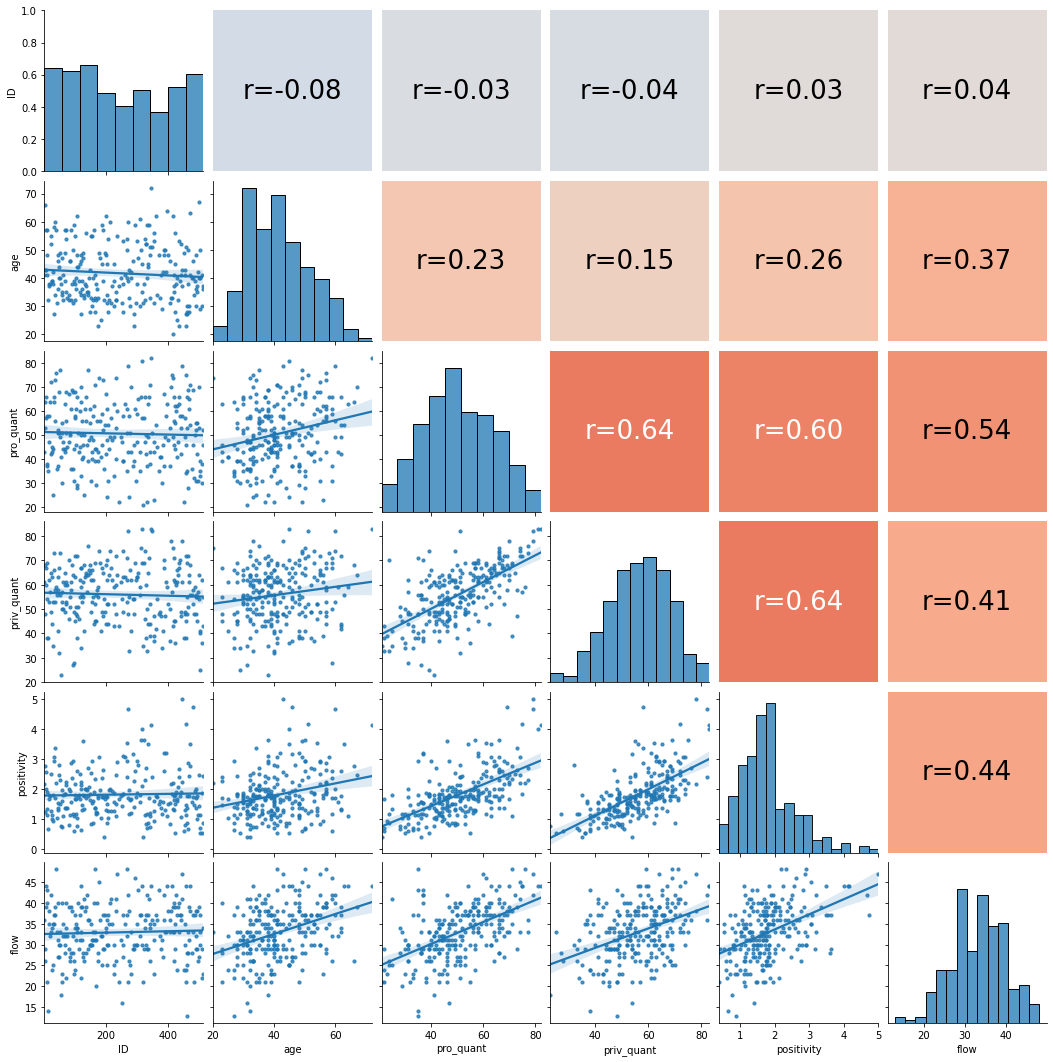

In [51]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Define the modified corrfunc function
def corrfunc(x, y, **kwds):
    cmap = plt.get_cmap('coolwarm')
    norm = plt.Normalize(vmin=-1, vmax=1)
    ax = plt.gca()
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    sns.despine(ax=ax, bottom=True, top=True, left=True, right=True)
    r, _ = pearsonr(x, y)
    facecolor = cmap(norm(r))
    ax.set_facecolor(facecolor)
    lightness = (max(facecolor[:3]) + min(facecolor[:3])) / 2
    ax.annotate(f"r={r:.2f}", xy=(.5, .5), xycoords=ax.transAxes,
                color='white' if lightness < 0.7 else 'black', size=26, ha='center', va='center')

g = sns.PairGrid(datac)
g.map_lower(sns.regplot, scatter_kws={'s': 10})
g.map_diag(sns.histplot, kde=False)
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0.06, hspace=0.06)  # Equal spacing in both directions
plt.show()

## 3.2 - Categorical Bivariate Analysis

🔵 Features: education vs. sex

 * Chi-Square Test of Independence:
   - Chi-Square Value: 1.8249843705978066
   - p-value: 0.8727928082190941
 * Cramer's V:
   - Value: 0.3899769619902573


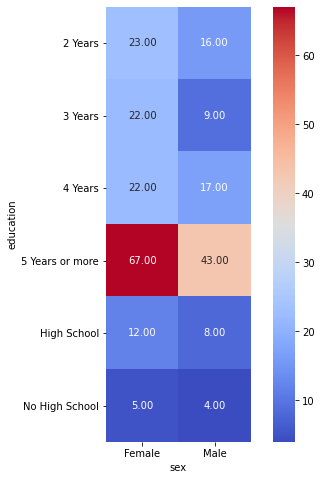


------------------------------




🔵 Features: education vs. famstatus

 * Chi-Square Test of Independence:
   - Chi-Square Value: 10.217108543351317
   - p-value: 0.42165665979460965
 * Cramer's V:
   - Value: 0.5327368681146891


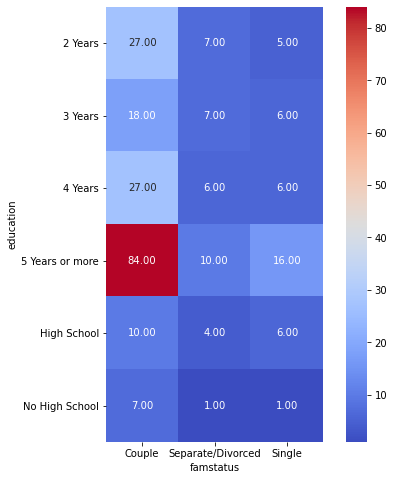


------------------------------




🔵 Features: education vs. pro_cat

 * Chi-Square Test of Independence:
   - Chi-Square Value: 11.946738012092295
   - p-value: 0.28863694985086
 * Cramer's V:
   - Value: 0.5760675599868738


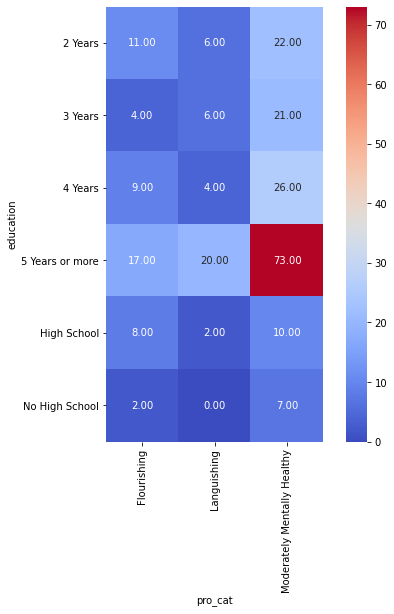


------------------------------




🔵 Features: education vs. priv_cat

 * Chi-Square Test of Independence:
   - Chi-Square Value: 10.975331768502498
   - p-value: 0.35944311921919964
 * Cramer's V:
   - Value: 0.5521506378723537


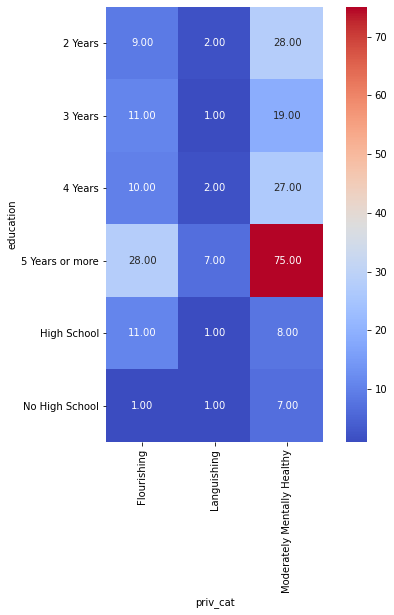


------------------------------




🔵 Features: sex vs. education

 * Chi-Square Test of Independence:
   - Chi-Square Value: 1.8249843705978066
   - p-value: 0.8727928082190941
 * Cramer's V:
   - Value: 0.3899769619902573


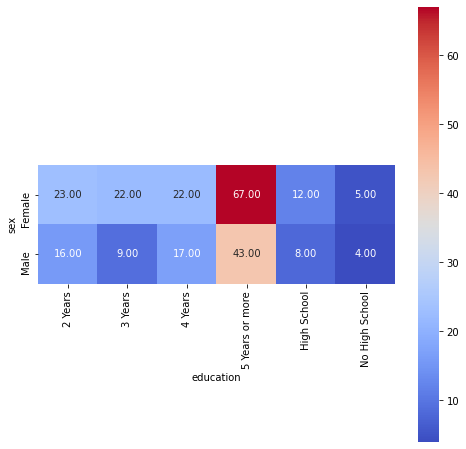


------------------------------




🔵 Features: sex vs. famstatus

 * Chi-Square Test of Independence:
   - Chi-Square Value: 8.26058510895296
   - p-value: 0.01607817439257878
 * Cramer's V:
   - Value: 1.173355949755015


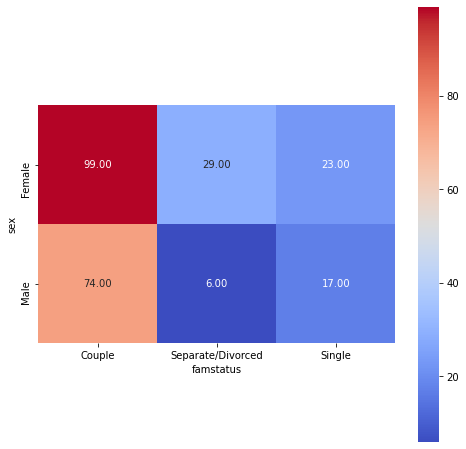


------------------------------




🔵 Features: sex vs. pro_cat

 * Chi-Square Test of Independence:
   - Chi-Square Value: 0.4664780874312233
   - p-value: 0.7919642368215398
 * Cramer's V:
   - Value: 0.27883032099325905


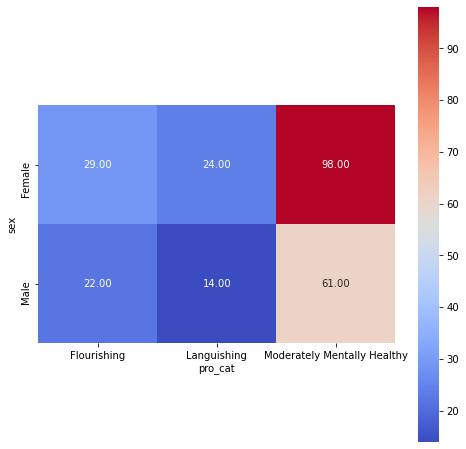


------------------------------




🔵 Features: sex vs. priv_cat

 * Chi-Square Test of Independence:
   - Chi-Square Value: 1.1076933617115814
   - p-value: 0.5747347316719426
 * Cramer's V:
   - Value: 0.4296691288483076


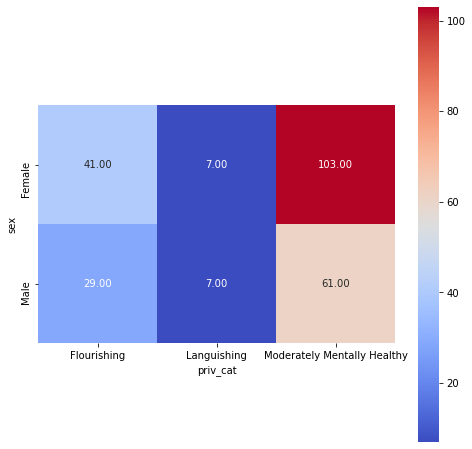


------------------------------




🔵 Features: famstatus vs. education

 * Chi-Square Test of Independence:
   - Chi-Square Value: 10.21710854335132
   - p-value: 0.42165665979460953
 * Cramer's V:
   - Value: 0.5327368681146891


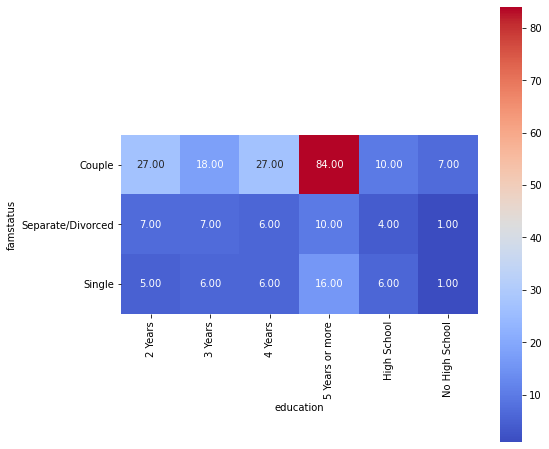


------------------------------




🔵 Features: famstatus vs. sex

 * Chi-Square Test of Independence:
   - Chi-Square Value: 8.26058510895296
   - p-value: 0.01607817439257878
 * Cramer's V:
   - Value: 1.173355949755015


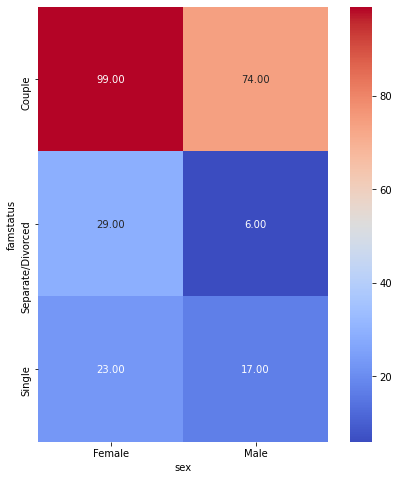


------------------------------




🔵 Features: famstatus vs. pro_cat

 * Chi-Square Test of Independence:
   - Chi-Square Value: 2.99164546865293
   - p-value: 0.5592244833296824
 * Cramer's V:
   - Value: 0.4076794402913567


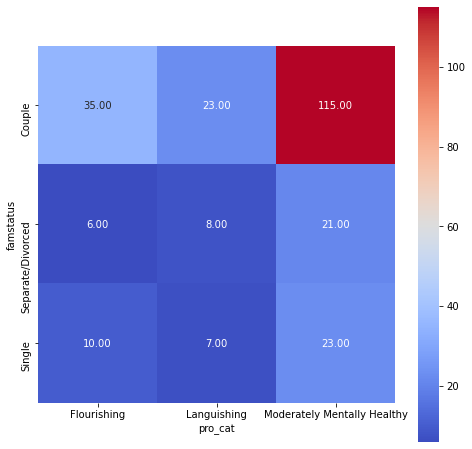


------------------------------




🔵 Features: famstatus vs. priv_cat

 * Chi-Square Test of Independence:
   - Chi-Square Value: 11.138439133724829
   - p-value: 0.02505142595276189
 * Cramer's V:
   - Value: 0.7866397994608612


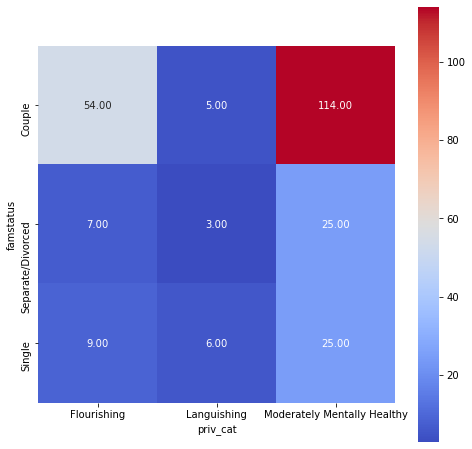


------------------------------




🔵 Features: pro_cat vs. education

 * Chi-Square Test of Independence:
   - Chi-Square Value: 11.946738012092297
   - p-value: 0.28863694985085997
 * Cramer's V:
   - Value: 0.5760675599868739


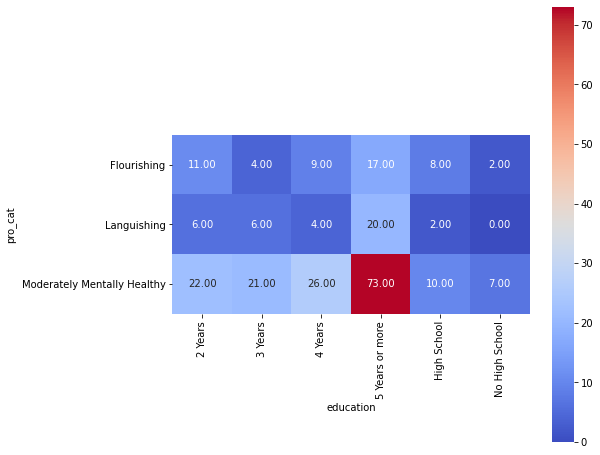


------------------------------




🔵 Features: pro_cat vs. sex

 * Chi-Square Test of Independence:
   - Chi-Square Value: 0.4664780874312233
   - p-value: 0.7919642368215398
 * Cramer's V:
   - Value: 0.27883032099325905


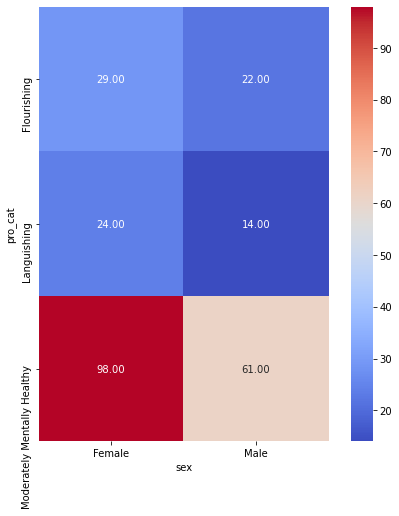


------------------------------




🔵 Features: pro_cat vs. famstatus

 * Chi-Square Test of Independence:
   - Chi-Square Value: 2.99164546865293
   - p-value: 0.5592244833296824
 * Cramer's V:
   - Value: 0.4076794402913567


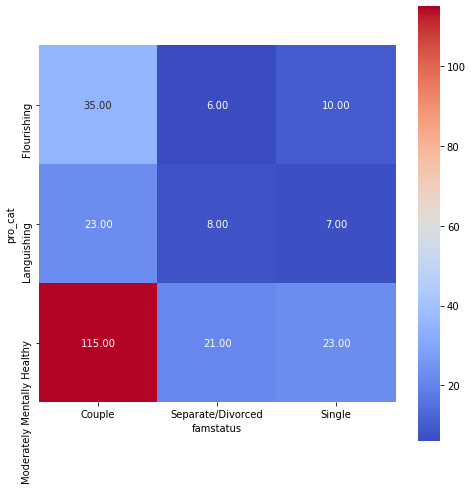


------------------------------




🔵 Features: pro_cat vs. priv_cat

 * Chi-Square Test of Independence:
   - Chi-Square Value: 70.95961781229556
   - p-value: 1.4235323065667048e-14
 * Cramer's V:
   - Value: 1.9854976679845222


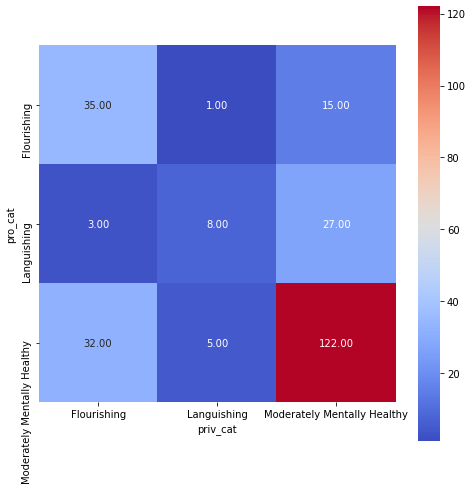


------------------------------




🔵 Features: priv_cat vs. education

 * Chi-Square Test of Independence:
   - Chi-Square Value: 10.9753317685025
   - p-value: 0.3594431192191995
 * Cramer's V:
   - Value: 0.5521506378723539


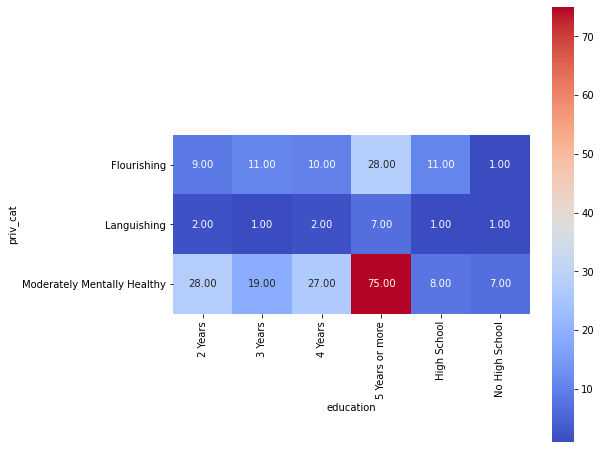


------------------------------




🔵 Features: priv_cat vs. sex

 * Chi-Square Test of Independence:
   - Chi-Square Value: 1.1076933617115812
   - p-value: 0.5747347316719426
 * Cramer's V:
   - Value: 0.42966912884830755


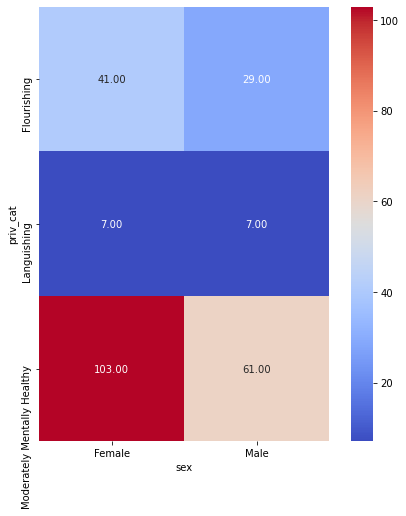


------------------------------




🔵 Features: priv_cat vs. famstatus

 * Chi-Square Test of Independence:
   - Chi-Square Value: 11.138439133724829
   - p-value: 0.02505142595276189
 * Cramer's V:
   - Value: 0.7866397994608612


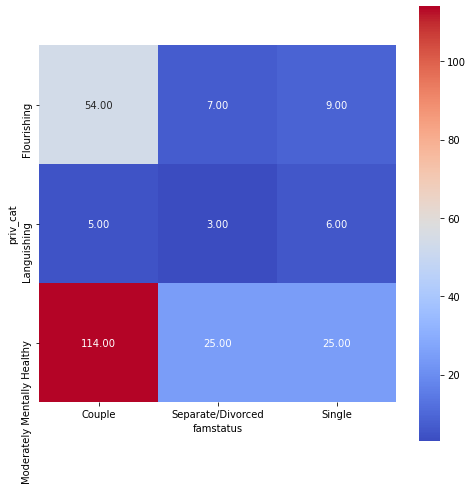


------------------------------




🔵 Features: priv_cat vs. pro_cat

 * Chi-Square Test of Independence:
   - Chi-Square Value: 70.95961781229556
   - p-value: 1.4235323065667048e-14
 * Cramer's V:
   - Value: 1.9854976679845222


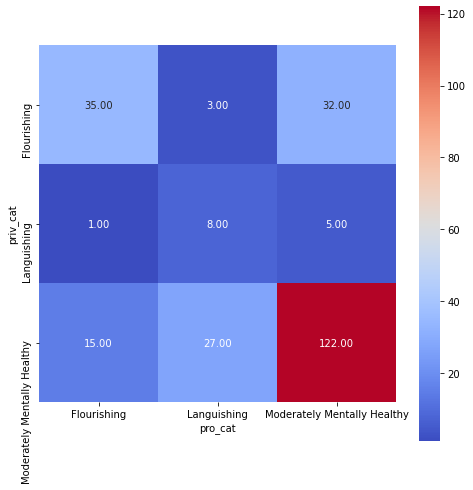


------------------------------




Finished! :D


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(chi2, shape):
    """Compute Cramér's V statistic for given chi-squared value and shape of contingency table."""
    n = shape[0] * shape[1]  # Total number of observations
    min_dim = min(shape) - 1  # Minimum dimension minus one
    return (chi2 / (n * min_dim))**0.5

categorical_features = datac.select_dtypes(include='object').columns

for c1 in categorical_features:
    for c2 in categorical_features:
        if c1 != c2:
            print(f"🔵 Features: {c1} vs. {c2}\n")

            # Create contingency table
            contingency_table = pd.crosstab(datac[c1], datac[c2])

            # Chi-Square Test of Independence
            chi2, p_chi2, _, _ = chi2_contingency(contingency_table)
            print(" * Chi-Square Test of Independence:")
            print("   - Chi-Square Value:", chi2)
            print("   - p-value:", p_chi2)

            # Cramer's V
            v = cramers_v(chi2, contingency_table.shape)
            print(" * Cramer's V:")
            print("   - Value:", v)

            # Plot the contingency table
            plt.figure(figsize=(8, 8))
            sns.heatmap(contingency_table, cmap="coolwarm", square=True, annot=True, fmt=".2f")
            plt.xlabel(c2)
            plt.ylabel(c1)
            plt.show()

            print("\n------------------------------\n\n\n\n")

print("Finished! :D")


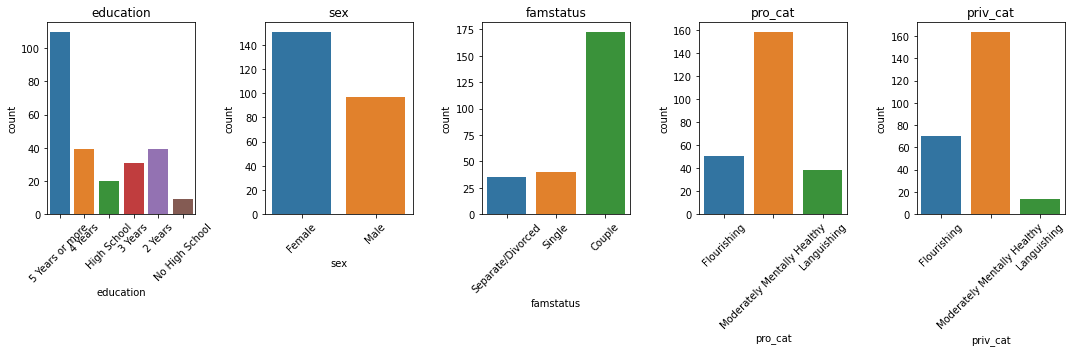

In [53]:
n_features = len(categorical_features)
fig, axes = plt.subplots(nrows=1, ncols=n_features, figsize=(15, 5))

# Loop through each categorical feature and plot
for i, feature in enumerate(categorical_features):
    sns.countplot(data=datac, x=feature, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

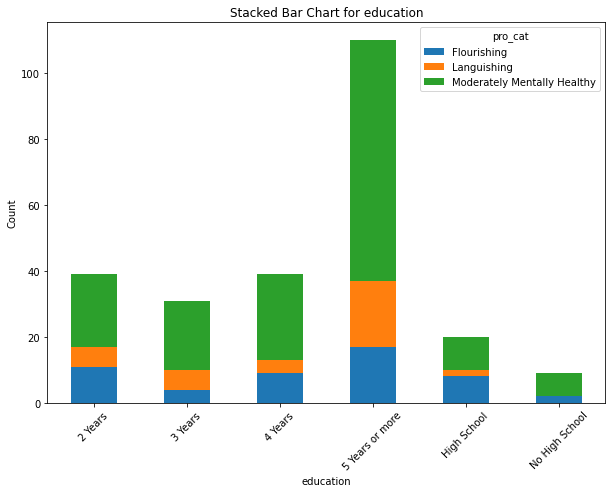

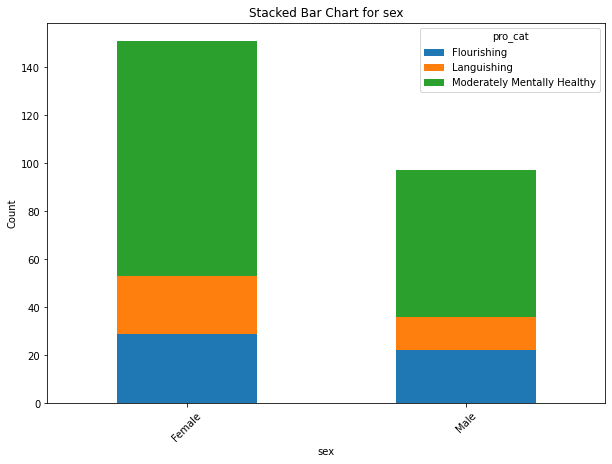

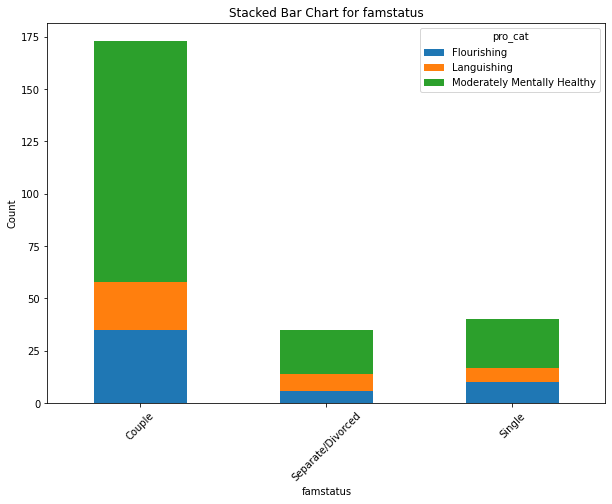

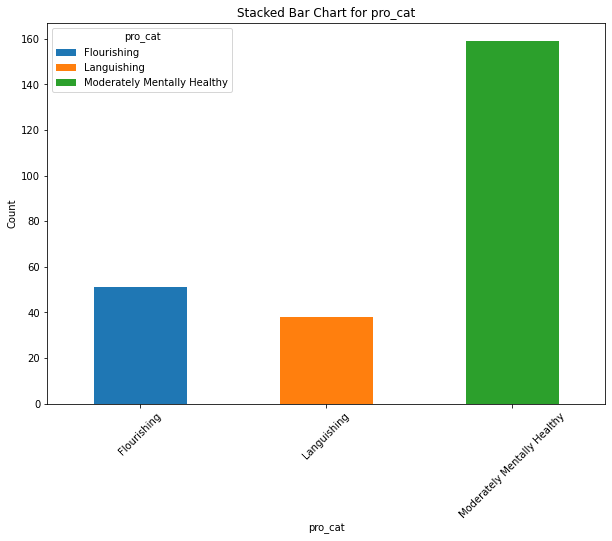

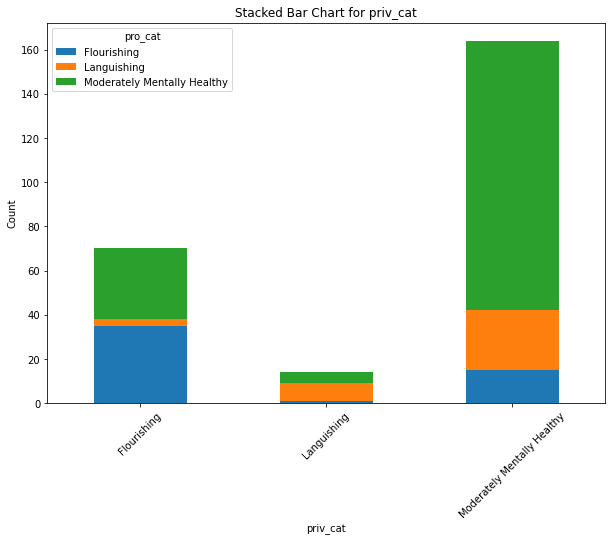

In [54]:
for feature in categorical_features:
    # Get value counts of the feature
    counts = datac[feature].value_counts()
    
    # If feature has more than one unique value
    if len(counts) > 1:
        # Plot stacked bar chart
        pd.crosstab(datac[feature], datac['pro_cat']).plot(kind='bar', stacked=True, figsize=(10,7))
        plt.title(f'Stacked Bar Chart for {feature}')
        plt.ylabel('Count')
        plt.xlabel(feature)
        plt.xticks(rotation=45)
        plt.legend(title='pro_cat')
        plt.show()

## 3.3 - Mixed Bivariate Analysis

In [55]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Dictionary to store ANOVA results
anova_results = {}

# Loop through each combination of categorical and continuous feature
for cat_feature in categorical_features:
    for num_feature in numerical_features:
        # Skip if the categorical feature is the target for the continuous feature
        if cat_feature != num_feature:
            # Define the formula for the model
            formula = f"{num_feature} ~ C({cat_feature})"
            
            # Fit the linear model
            model = ols(formula, data=data).fit()
            
            # Compute the ANOVA table
            anova_table = sm.stats.anova_lm(model, typ=2)
            
            # Store the result
            anova_results[(cat_feature, num_feature)] = anova_table

# Extract p-values for each combination and store in a DataFrame
anova_pvalues = pd.DataFrame(index=numerical_features, columns=categorical_features)

for (cat_feature, num_feature), anova_table in anova_results.items():
    anova_pvalues.at[num_feature, cat_feature] = anova_table.iloc[0]['PR(>F)']

anova_pvalues

,education,sex,famstatus,pro_cat,priv_cat
ID,0.241869,0.658144,0.644843,0.419525,0.529151
age,0.0949831,0.526908,3.04228e-07,0.0085626,0.0359204
pro_quant,0.0331385,0.355675,0.74636,1.37597e-69,7.75259e-16
priv_quant,0.225657,0.900671,0.0220787,1.71015e-20,5.73253e-53
positivity,0.218672,0.0363158,0.25367,5.80913e-19,6.0113e-15
flow,0.00274669,0.48745,0.186796,1.07331e-11,1.43293e-07


In [60]:
# Compute the correlation matrix and the p-value matrix
correlation_matrix = data[numerical_features].corr(method='pearson')

# Initialize a DataFrame to store p-values
pvalue_matrix = pd.DataFrame(index=numerical_features, columns=numerical_features)

for feature1 in numerical_features:
    for feature2 in numerical_features:
        # Get the p-value
        _, pvalue = pearsonr(data[feature1], data[feature2])
        pvalue_matrix.at[feature1, feature2] = pvalue

In [61]:
correlation_matrix

,ID,age,pro_quant,priv_quant,positivity,flow
ID,1.000000,-0.077344,-0.030577,-0.041959,0.026604,0.038939
age,-0.077344,1.000000,0.229625,0.151607,0.257054,0.367994
pro_quant,-0.030577,0.229625,1.000000,0.635679,0.603502,0.536229
priv_quant,-0.041959,0.151607,0.635679,1.000000,0.636000,0.409439
positivity,0.026604,0.257054,0.603502,0.636000,1.000000,0.439782
flow,0.038939,0.367994,0.536229,0.409439,0.439782,1.000000


In [62]:
pvalue_matrix

,ID,age,pro_quant,priv_quant,positivity,flow
ID,0,0.224869,0.631787,0.510715,0.676744,0.541633
age,0.224869,0,0.000265614,0.016882,4.19106e-05,2.27358e-09
pro_quant,0.631787,0.000265614,0,1.76861e-29,5.36455e-26,7.27526e-20
priv_quant,0.510715,0.016882,1.76861e-29,0,1.625e-29,1.92227e-11
positivity,0.676744,4.19106e-05,5.36455e-26,1.625e-29,0,3.75119e-13
flow,0.541633,2.27358e-09,7.27526e-20,1.92227e-11,3.75119e-13,0


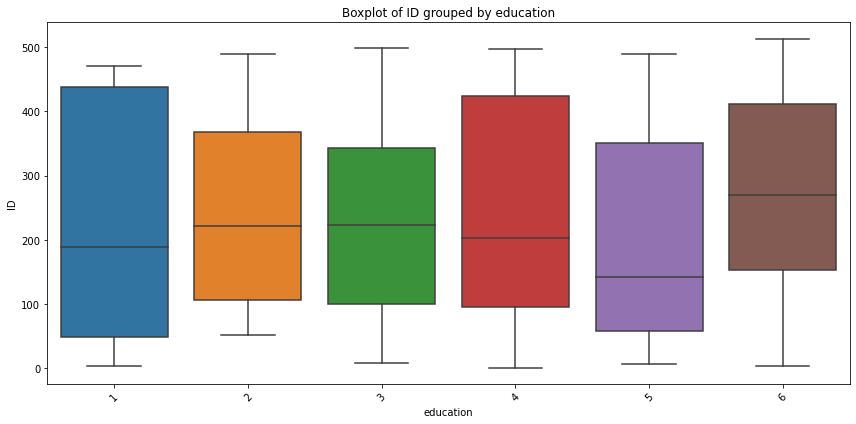

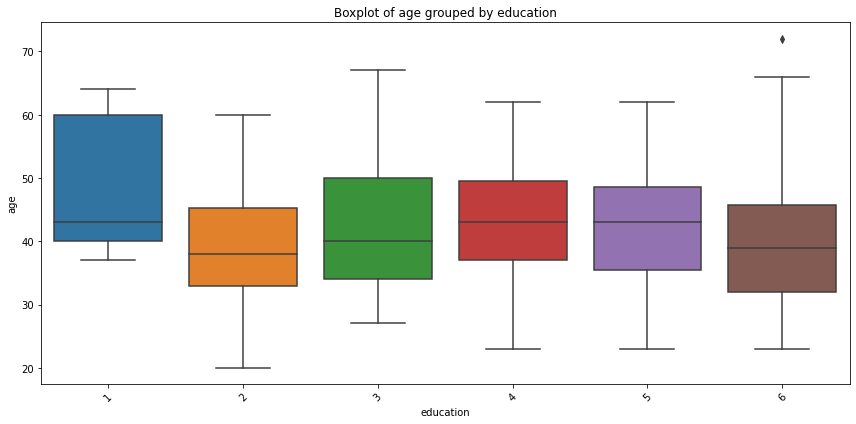

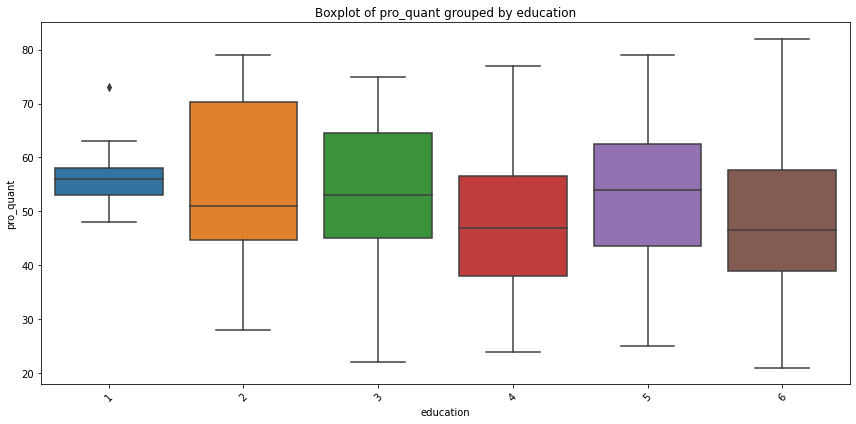

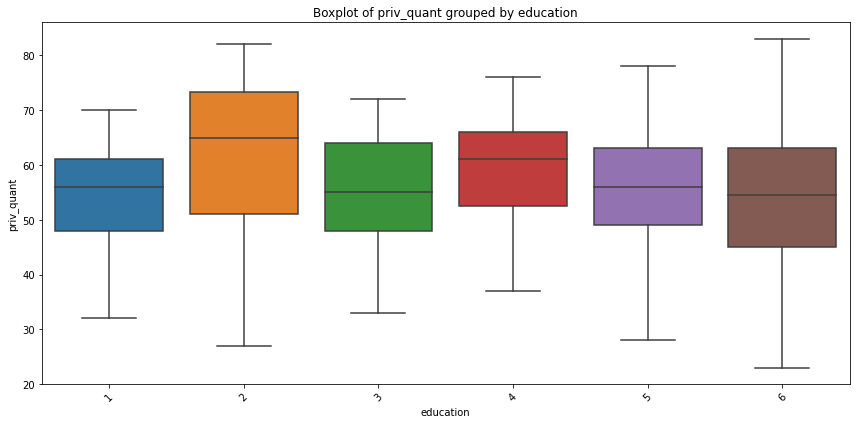

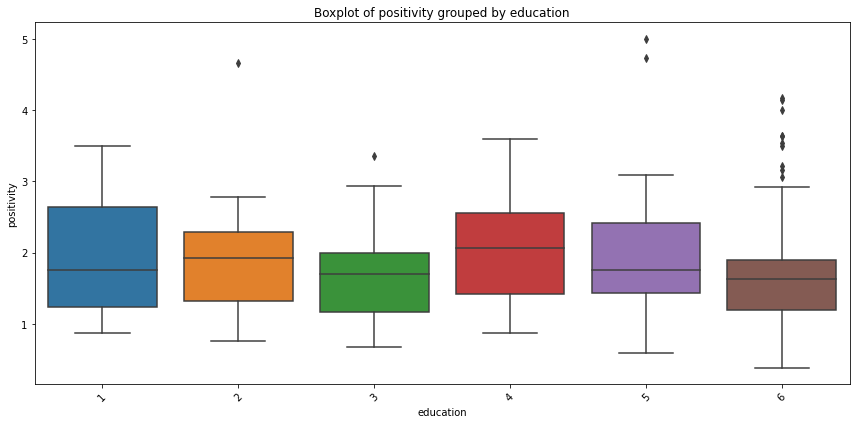

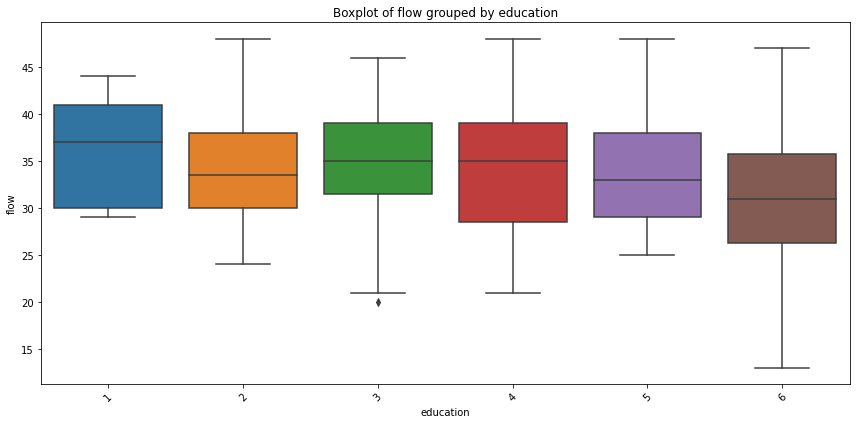

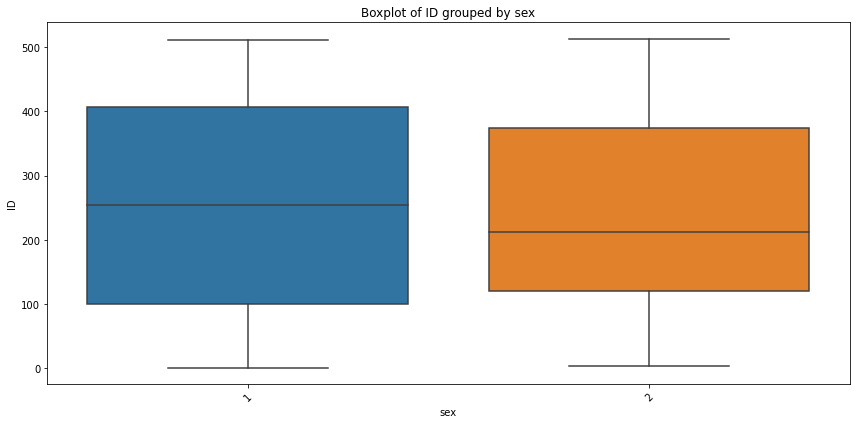

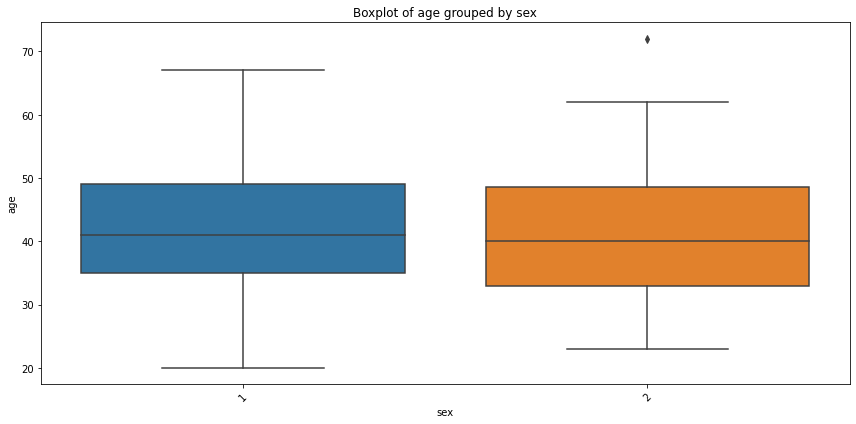

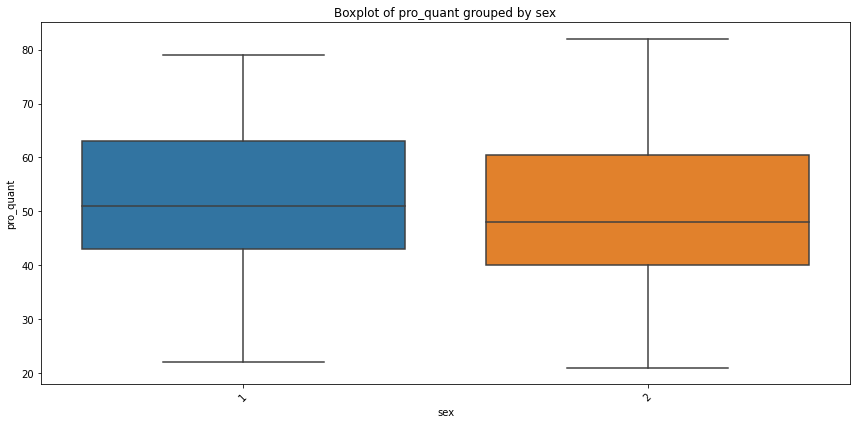

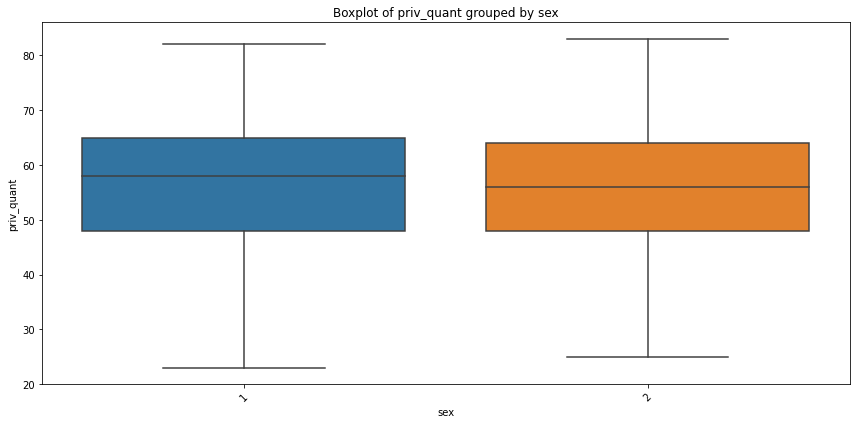

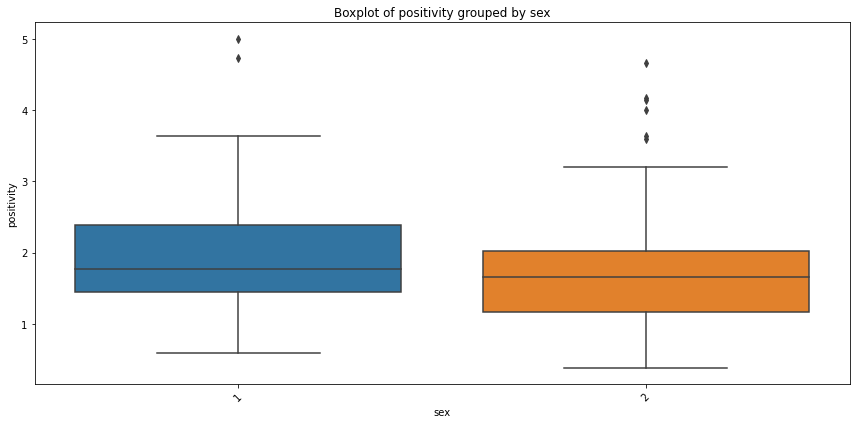

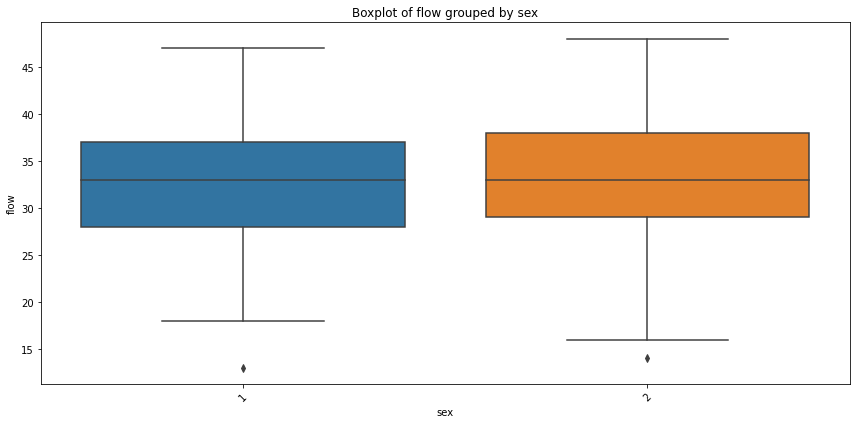

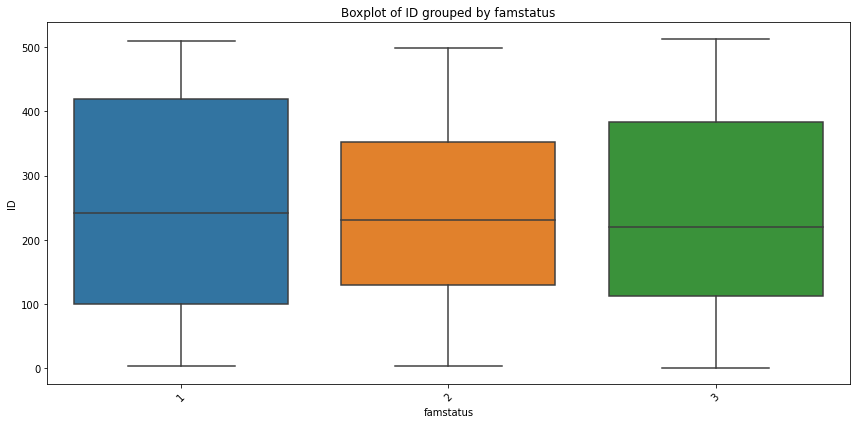

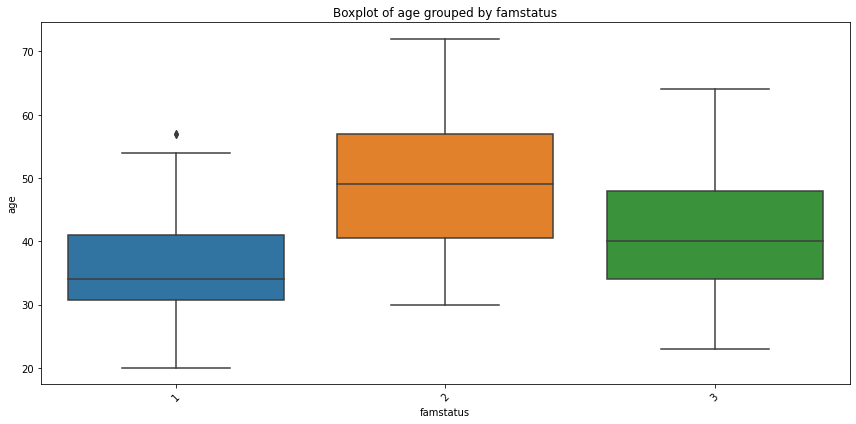

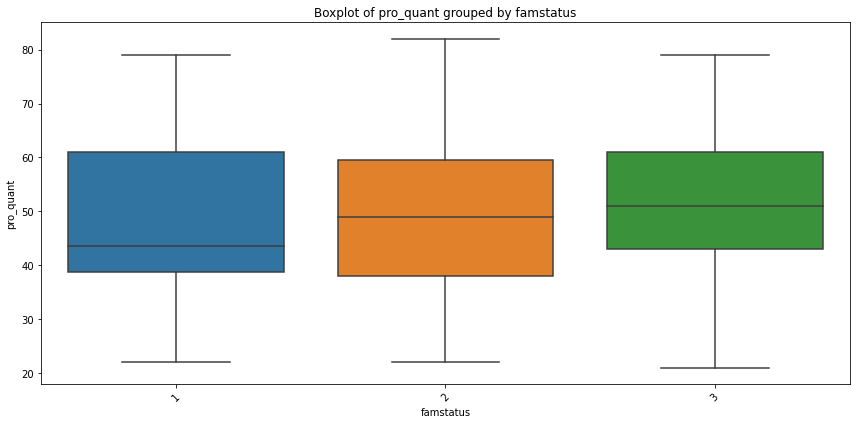

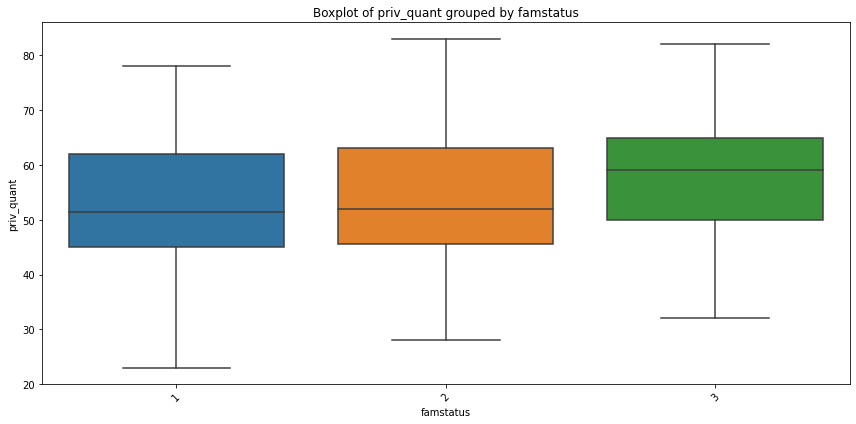

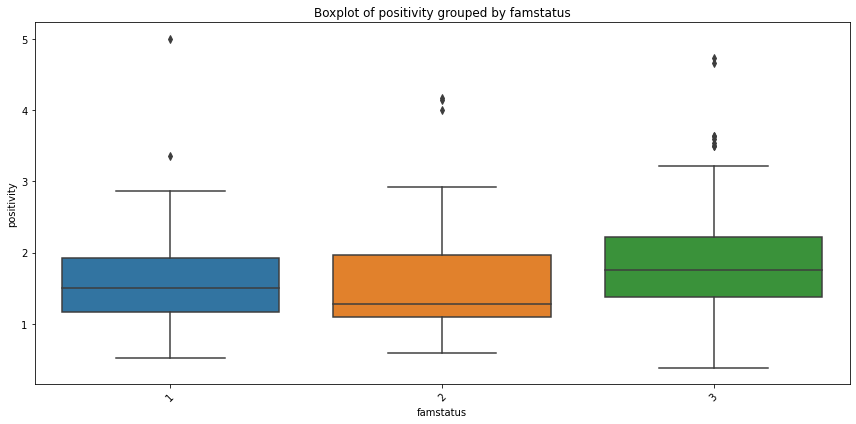

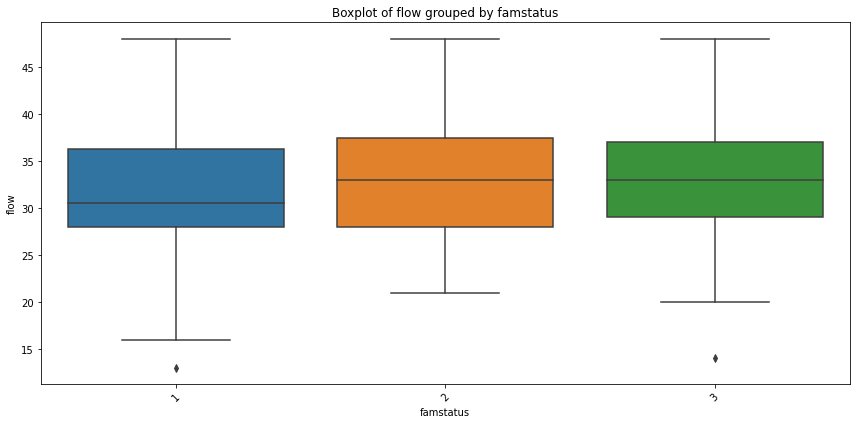

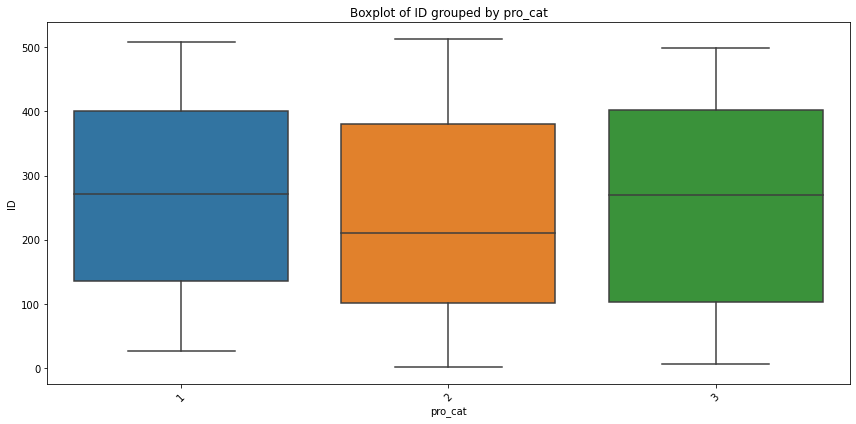

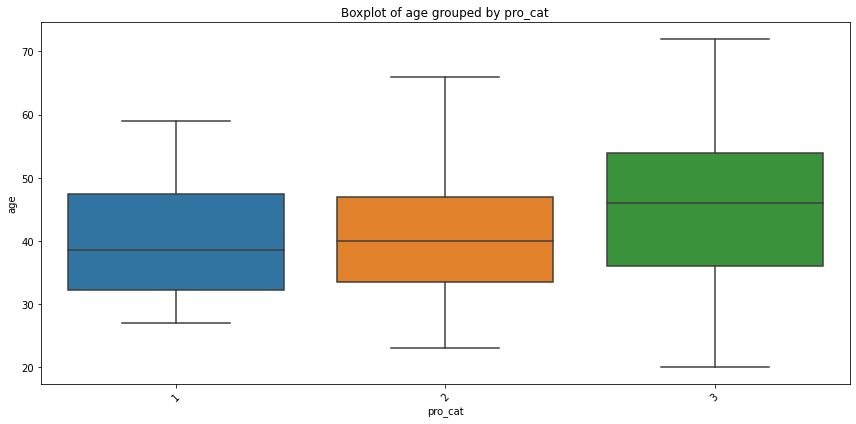

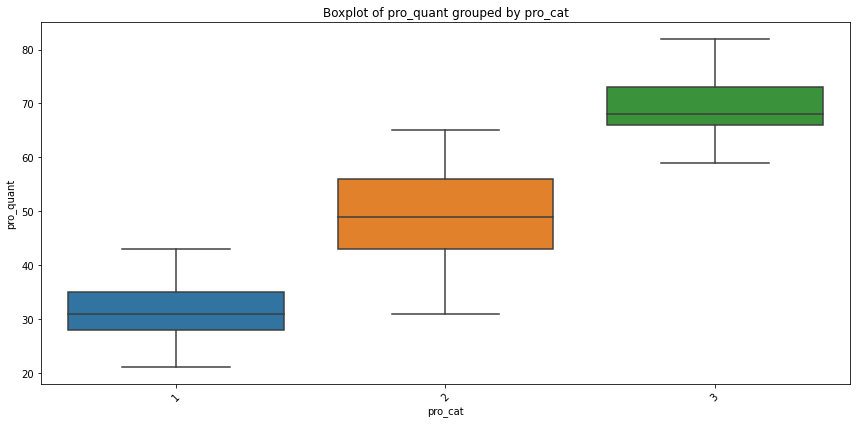

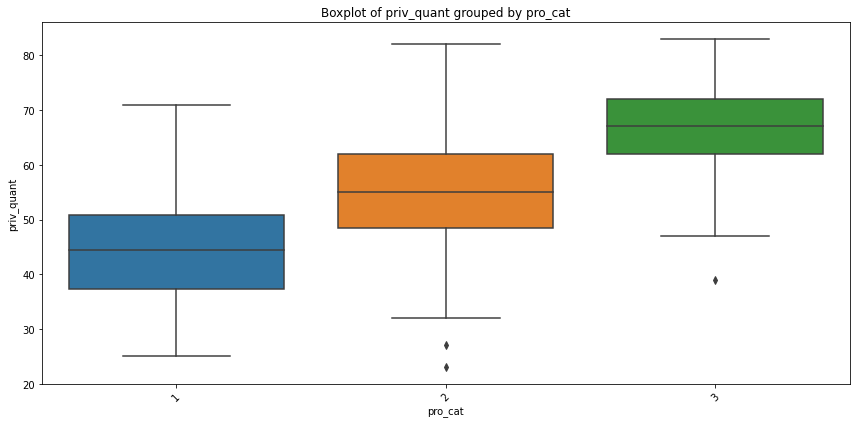

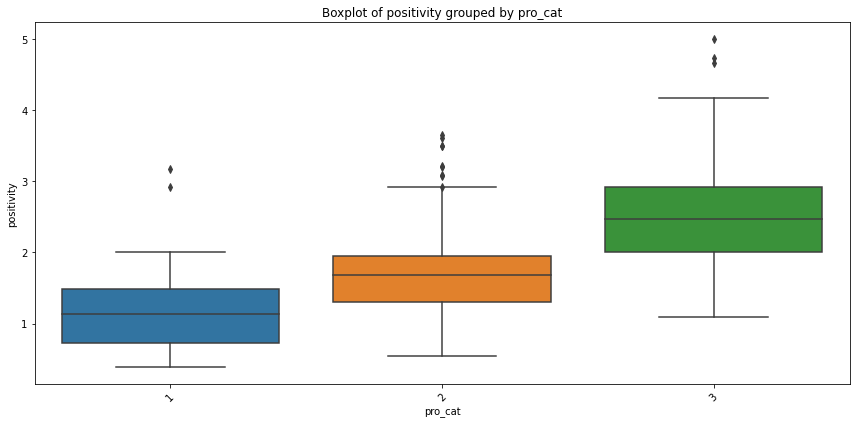

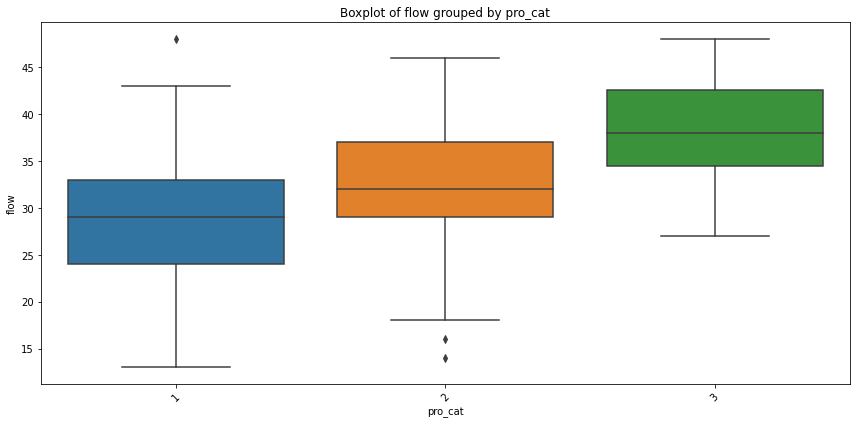

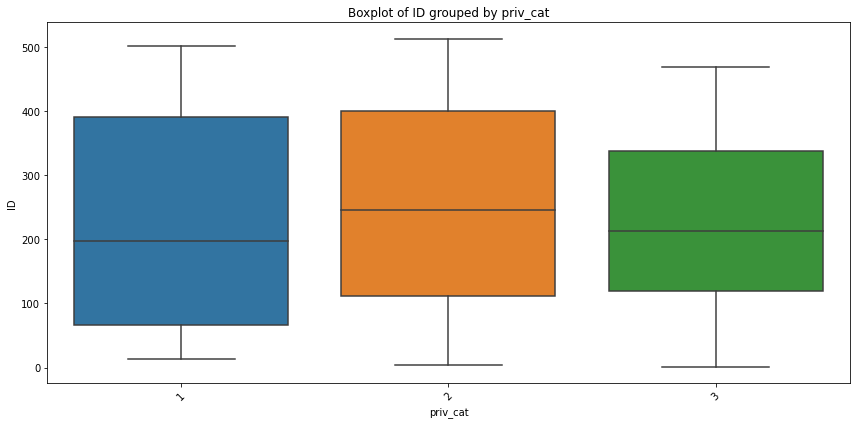

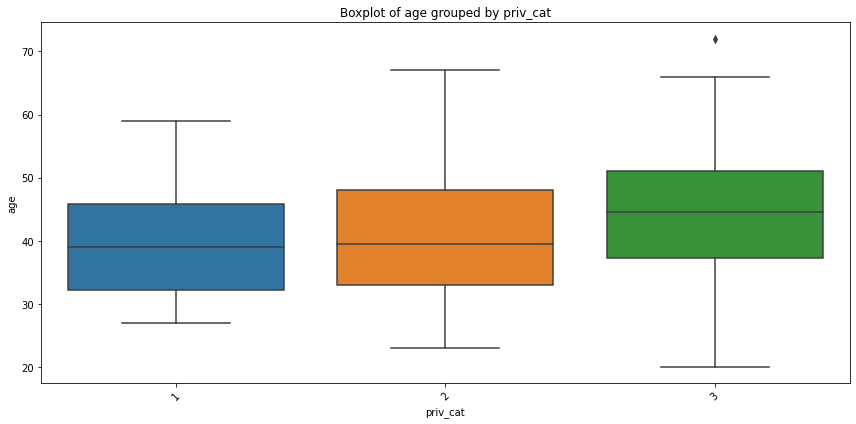

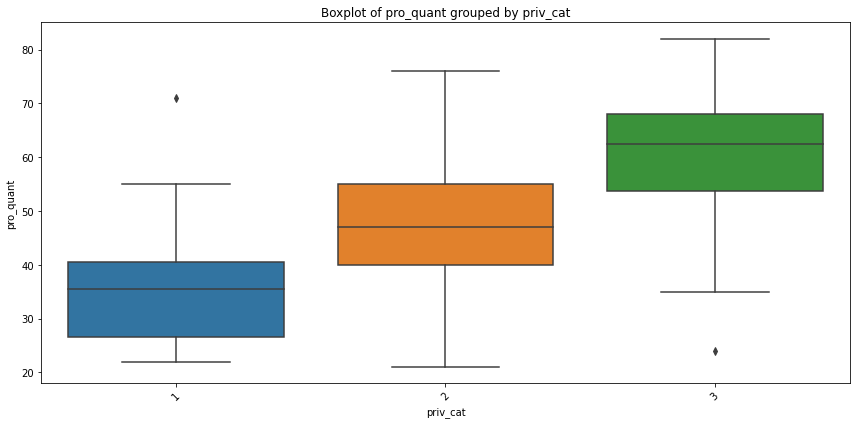

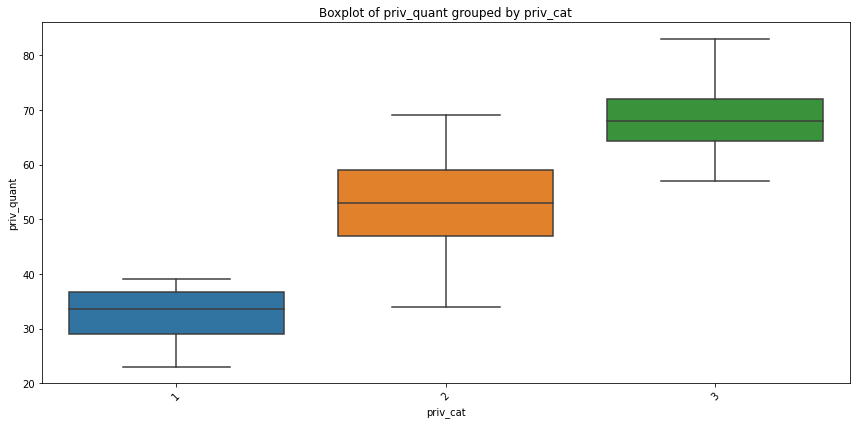

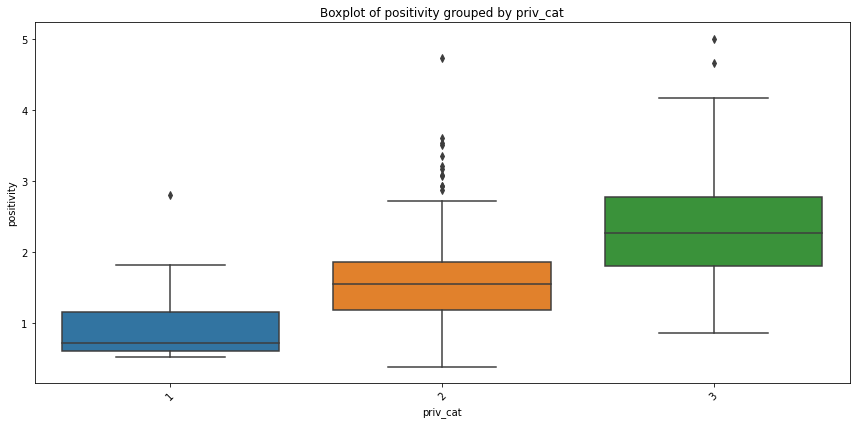

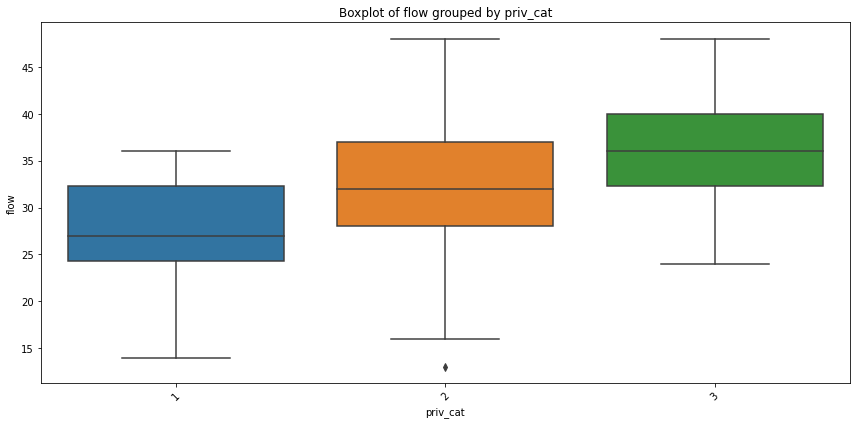

In [57]:
for cat_feature in categorical_features:
    for num_feature in numerical_features:
        if cat_feature != num_feature:
            plt.figure(figsize=(12, 6))
            sns.boxplot(x=cat_feature, y=num_feature, data=data)
            plt.title(f'Boxplot of {num_feature} grouped by {cat_feature}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

# Step 4 - Modeling

## 4.1 - Linear Regression Model

In [81]:
# One-hot encode the categorical columns
datac_encoded = pd.get_dummies(datac, columns=['education', 'sex', 'famstatus', 'pro_cat', 'priv_cat'], drop_first=True)

# Display the first few rows of the encoded dataframe
datac_encoded.head()

,ID,age,pro_quant,priv_quant,positivity,flow,education_3 Years,education_4 Years,education_5 Years or more,education_High School,education_No High School,sex_Male,famstatus_Separate/Divorced,famstatus_Single,pro_cat_Languishing,pro_cat_Moderately Mentally Healthy,priv_cat_Languishing,priv_cat_Moderately Mentally Healthy
0,344,72,82,83,4.142857,44,0,0,1,0,0,0,1,0,0,0,0,0
1,317,45,81,83,4.000000,44,0,0,1,0,0,0,1,0,0,0,0,0
2,444,43,79,78,5.000000,47,0,1,0,0,0,1,0,1,0,0,0,0
3,270,60,79,82,4.666667,42,0,0,0,1,0,0,0,0,0,0,0,0
4,52,49,77,73,2.285714,33,0,0,0,1,0,0,1,0,0,0,0,0


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features and the target
lnr_X = datac_encoded.drop(['ID', 'flow'], axis=1)
lnr_y = datac_encoded['flow']

# Split the data into training and test sets (70% training, 30% test)
lnr_X_train, lnr_X_test, lnr_y_train, lnr_y_test = train_test_split(lnr_X, lnr_y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
lnr_X_train_standardized = scaler.fit_transform(lnr_X_train)
lnr_X_test_standardized = scaler.transform(lnr_X_test)

lnr_X_train_standardized[:5], lnr_y_train.head()

(array([[-1.08494423,  0.18353646, -0.61428224, -1.28938776, -0.33011265,
         -0.46723641, -0.83431315, -0.31923475, -0.20535013, -0.77579111,
         -0.41099747, -0.43003663, -0.42056004,  0.75678747, -0.18954721,
          0.7101745 ],
        [-0.69165905,  0.18353646, -0.79243953, -0.94269028, -0.33011265,
         -0.46723641, -0.83431315,  3.13249102, -0.20535013, -0.77579111,
          2.43310501, -0.43003663, -0.42056004,  0.75678747, -0.18954721,
          0.7101745 ],
        [-0.49501646,  0.55533747,  0.45466154, -0.23535003, -0.33011265,
          2.14024418, -0.83431315, -0.31923475, -0.20535013, -0.77579111,
         -0.41099747, -0.43003663, -0.42056004,  0.75678747, -0.18954721,
          0.7101745 ],
        [-0.69165905,  1.96818134,  1.70176261,  1.14305662,  3.02926899,
         -0.46723641, -0.83431315, -0.31923475, -0.20535013, -0.77579111,
         -0.41099747, -0.43003663, -0.42056004, -1.32137495, -0.18954721,
         -1.40810462],
        [-0.88830164

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the linear regression model
lnr_regressor = LinearRegression()
lnr_regressor.fit(lnr_X_train, lnr_y_train)

# Predict on the test set
lnr_predictions = lnr_regressor.predict(lnr_X_test)

# Calculate the mean squared error for the linear regression model
lnr_mse = mean_squared_error(lnr_y_test, lnr_predictions)

lnr_mse

33.18966102729795

In [92]:
from sklearn.neighbors import KNeighborsRegressor

# Train the KNN regressor model
lnr_knn_regressor = KNeighborsRegressor(n_neighbors=5)
lnr_knn_regressor.fit(lnr_X_train_standardized, lnr_y_train)

# Predict on the test set using standardized features
lnr_knn_predictions = lnr_knn_regressor.predict(lnr_X_test_standardized)

# Calculate the mean squared error for the KNN model
lnr_knn_mse = mean_squared_error(lnr_y_test, lnr_knn_predictions)

lnr_knn_mse

36.21653333333334

## 4.2 - Logistic Regression Model

In [93]:
# Determine the 33rd and 66th percentiles
low_threshold = datac['flow'].quantile(0.33)
high_threshold = datac['flow'].quantile(0.66)

# Categorize the 'flow' values into 'Low', 'Medium', and 'High'
datac['flow_category'] = 'Medium'  # Default to 'Medium'
datac.loc[datac['flow'] <= low_threshold, 'flow_category'] = 'Low'
datac.loc[datac['flow'] > high_threshold, 'flow_category'] = 'High'

# Display the distribution of the new categorical 'flow_category'
datac['flow_category'].value_counts()

Low       92
High      81
Medium    75
Name: flow_category, dtype: int64

In [98]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'flow_category' column
datac['flow_category_encoded'] = LabelEncoder().fit_transform(datac['flow_category'])

# Define the features and the new categorical target
lor_X = datac_encoded.drop(['ID', 'flow'], axis=1)
lor_y = datac['flow_category_encoded']

# Split the data into training and test sets (70% training, 30% test)
lor_X_train, lor_X_test, lor_y_train, lor_y_test = train_test_split(lor_X, lor_y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
lor_X_train_standardized = scaler.fit_transform(lor_X_train)
lor_X_test_standardized = scaler.transform(lor_X_test)

lor_X_train_standardized[:5], lor_y_train.head()

(array([[-1.08494423,  0.18353646, -0.61428224, -1.28938776, -0.33011265,
         -0.46723641, -0.83431315, -0.31923475, -0.20535013, -0.77579111,
         -0.41099747, -0.43003663, -0.42056004,  0.75678747, -0.18954721,
          0.7101745 ],
        [-0.69165905,  0.18353646, -0.79243953, -0.94269028, -0.33011265,
         -0.46723641, -0.83431315,  3.13249102, -0.20535013, -0.77579111,
          2.43310501, -0.43003663, -0.42056004,  0.75678747, -0.18954721,
          0.7101745 ],
        [-0.49501646,  0.55533747,  0.45466154, -0.23535003, -0.33011265,
          2.14024418, -0.83431315, -0.31923475, -0.20535013, -0.77579111,
         -0.41099747, -0.43003663, -0.42056004,  0.75678747, -0.18954721,
          0.7101745 ],
        [-0.69165905,  1.96818134,  1.70176261,  1.14305662,  3.02926899,
         -0.46723641, -0.83431315, -0.31923475, -0.20535013, -0.77579111,
         -0.41099747, -0.43003663, -0.42056004, -1.32137495, -0.18954721,
         -1.40810462],
        [-0.88830164

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the logistic regression model
lor_classifier = LogisticRegression(max_iter=1000, random_state=42)
lor_classifier.fit(lor_X_train, lor_y_train)

# Predict on the test set
lor_class_predictions = lor_classifier.predict(lor_X_test)

# Calculate the accuracy for the logistic regression model
lor_accuracy = accuracy_score(lor_y_test, lor_class_predictions)

lor_accuracy

0.44